In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read file
attrition_data = pd.read_csv("Employee Attrition for Healthcare/watson_healthcare_modified.csv")

In [3]:
# Preview dataframe
attrition_data.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Number of observations
len(attrition_data)

1676

## Attrition in Registered Nursing Workforce

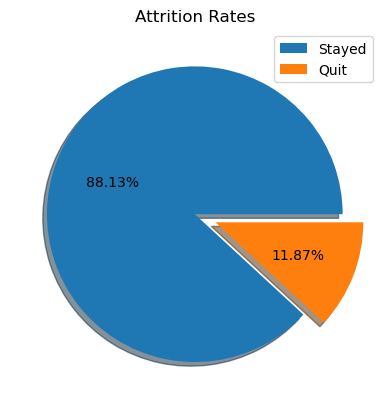

In [5]:
# Attrition Rates
yesNo = pd.DataFrame(attrition_data.groupby("Attrition")["EmployeeID"].count())
attritionRates = yesNo.plot(kind="pie", y="EmployeeID", ylabel="", title="Attrition Rates", labeldistance=None, shadow=True, explode=[0,0.15],  autopct="%1.2f%%")
attritionRates.legend(["Stayed", "Quit"])
plt.savefig("Attrition Rates.png")

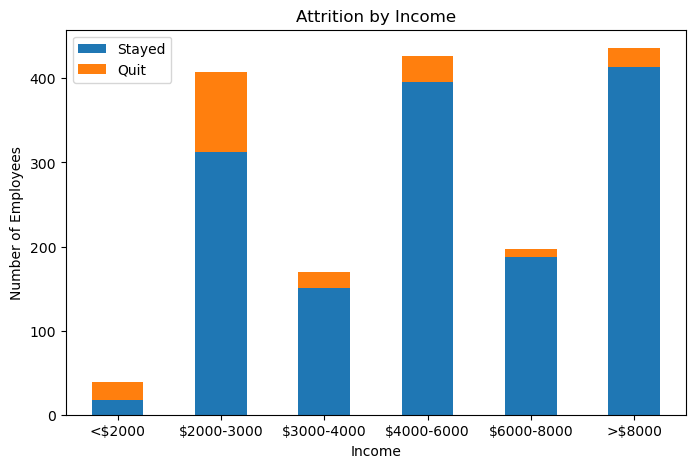

In [6]:
# Income Comparison
incomeBinsAll = [0,2000,3000,4000,6000,8000, 20000]
incomeLabelsAll = ["<$2000", "$2000-3000", "$3000-4000", "$4000-6000", "$6000-8000", ">$8000"]
incComp = attrition_data.copy()
incComp["Income"] = pd.cut(incComp["MonthlyIncome"], incomeBinsAll, labels=incomeLabelsAll)

incComparison = incComp.groupby(["Income", "Attrition"]).size().unstack().plot(kind='bar', stacked=True, ylabel="Number of Employees", title="Attrition by Income", figsize=(8,5), rot=0)
incComparison.legend(["Stayed", "Quit"])
plt.savefig("Attrition by Income Comparison")

In [7]:
# Create and display dataframe of those who quit
attritionYes = attrition_data[attrition_data["Attrition"]=="Yes"].reset_index(drop=True)
attritionYes.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
1,1420391,28,Yes,Travel_Rarely,103,Maternity,24,3,Life Sciences,1,...,2,80,0,6,4,3,4,2,0,3
2,1142062,32,Yes,Travel_Frequently,1125,Maternity,16,1,Life Sciences,1,...,2,80,0,10,5,3,10,2,6,7
3,1884939,24,Yes,Travel_Rarely,813,Maternity,1,3,Medical,1,...,1,80,1,6,2,2,2,0,2,0
4,1058169,50,Yes,Travel_Rarely,869,Cardiology,3,2,Marketing,1,...,3,80,0,3,2,3,3,2,0,2


In [8]:
# Number of observations
len(attritionYes)

199

## Attrition Demographics

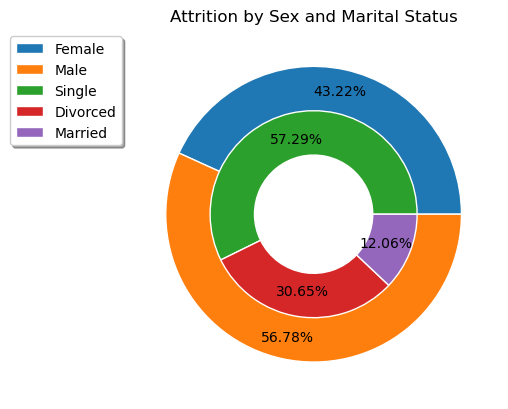

In [9]:
# Attrition by Sex and Marital Status
sex=attritionYes.groupby("Gender")["Attrition"].count()
mStatus=attritionYes["MaritalStatus"].value_counts()
xmLabels=["Female", "Male", "Single", "Divorced", "Married"]

fig, ax = plt.subplots()

plota = ax.pie(sex, 
       radius=1,  
       labels=None, 
       autopct="%1.2f%%",
       pctdistance=0.85,
       wedgeprops=dict(width=0.5, edgecolor='w'))

plotb = ax.pie(mStatus, 
       radius=1-0.3,
       labels=None,
       autopct="%1.2f%%",
       pctdistance=0.75,
       wedgeprops=dict(width=0.3, edgecolor='w'))

ax.set_title("Attrition by Sex and Marital Status")
ax.legend(plota[0] + plotb[0], xmLabels, bbox_to_anchor=(0,0,0,1), loc="upper right", shadow=True)
plt.savefig("Attrition by Sex and Marital Status")
# Note: this chart will not show overlap of sex and marital status

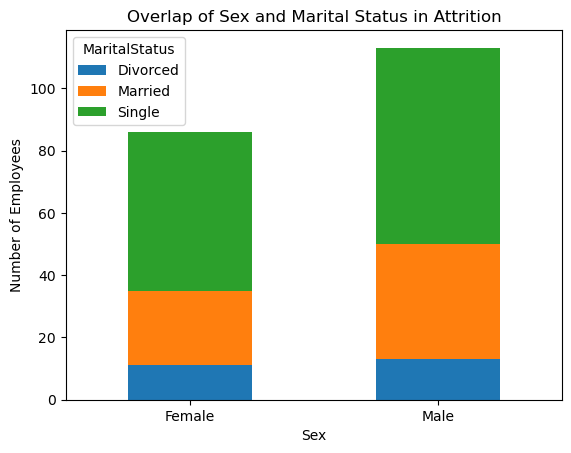

In [10]:
# Overlap of sex and marital status 
smOverlap = attritionYes.groupby(["Gender","MaritalStatus"]).size().unstack().plot(kind='bar', stacked=True, xlabel="Sex", ylabel="Number of Employees", title="Overlap of Sex and Marital Status in Attrition", rot=0)
plt.savefig("Overlap of Sex and Marital Status in Attrition")

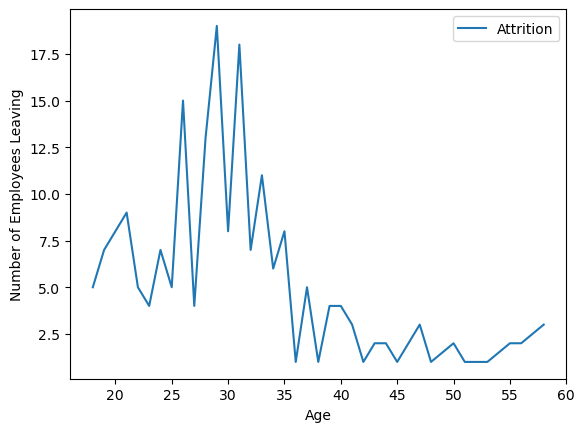

In [11]:
# Attrition by Age
ageYes=pd.DataFrame(attritionYes.groupby("Age")["Attrition"].count())
attritionAge = ageYes.plot(kind="line", ylabel="Number of Employees Leaving")

## Major Factors in Attrition

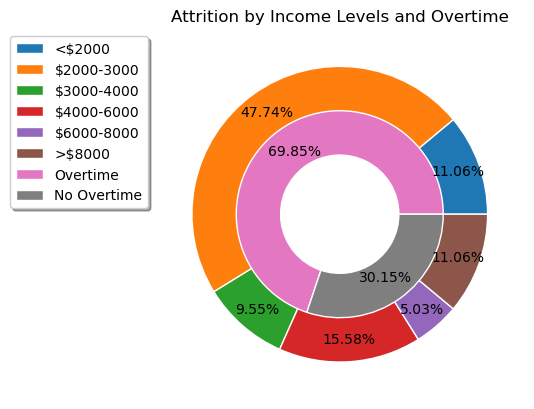

In [12]:
# Attrition by Income Levels & Overtime
# Add bins to add income levels column
incomeBins = [0,2000,3000,4000,6000,8000, 20000]
incomeLabels = ["<$2000", "$2000-3000", "$3000-4000", "$4000-6000", "$6000-8000", ">$8000"]
attritionYes["Income"] = pd.cut(attritionYes["MonthlyIncome"], incomeBins, labels=incomeLabels)

# Nested pie char
incomeYes=attritionYes.groupby("Income")["Attrition"].count()
overtime=attritionYes["OverTime"].value_counts()
iOLabels = ["<$2000", "$2000-3000", "$3000-4000", "$4000-6000", "$6000-8000", ">$8000","Overtime", "No Overtime"]
fig, ax = plt.subplots()

plot1 = ax.pie(incomeYes, 
       radius=1,  
       labels=None, 
       autopct="%1.2f%%",
       pctdistance=0.85,
       wedgeprops=dict(width=0.5, edgecolor='w')) # makes it a donut

plot2 = ax.pie(overtime, 
       radius=1-0.3,
       labels=None,
       autopct="%1.2f%%",
       pctdistance=0.75,
       wedgeprops=dict(width=0.3, edgecolor='w'))

ax.set_title("Attrition by Income Levels and Overtime")
ax.legend(plot1[0] + plot2[0], iOLabels, bbox_to_anchor=(0,0,0,1), loc="upper right", shadow=True)
plt.savefig("Attrition by Income Levels and Overtime")
# Note: this chart does not show an overlap between income levels and overtime

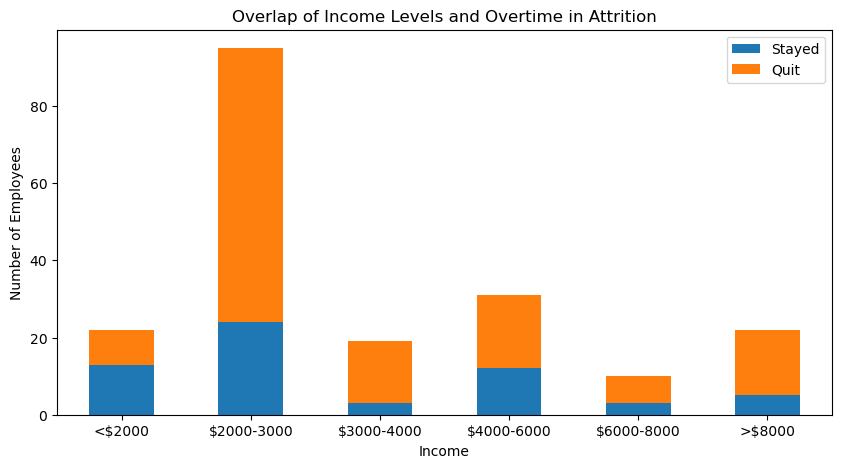

In [13]:
# Overlap of income levels and overtime 
ioOverlap = attritionYes.groupby(["Income", "OverTime"]).size().unstack().plot(kind='bar', stacked=True, ylabel="Number of Employees", title="Overlap of Income Levels and Overtime in Attrition" , figsize=(10,5), rot=0)
ioOverlap.legend(["Stayed", "Quit"])
plt.savefig("Overlap of Income Levels and Overtime in Attrition")

In [226]:
# Percent of attrition with low income and overtime
lowIncome = attritionYes.loc[(attritionYes["Income"]=="<$2000") | (attritionYes["Income"]=="$2000-3000")]
lowIncomeOvertime = lowIncome.loc[(lowIncome["OverTime"]=="Yes")]
lowIncOT = len(lowIncomeOvertime)/len(attritionYes)*100
lowIncOT

40.20100502512563

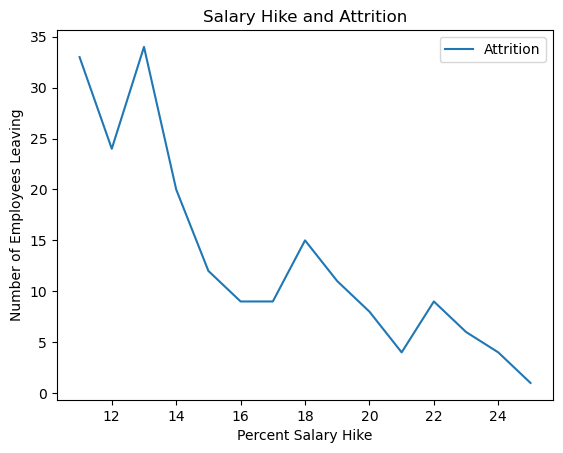

In [228]:
# Attrition by Percent Salary Hike
salaryHikeYes=pd.DataFrame(attritionYes.groupby("PercentSalaryHike")["Attrition"].count())
attritionSHike = salaryHikeYes.plot(kind="line", xlabel="Percent Salary Hike", ylabel="Number of Employees Leaving", title="Salary Hike and Attrition")
plt.savefig("Salary Hike and Attrition.png")

In [232]:
# Percent of attrition with low salary hike
lowsalaryHike = attritionYes.loc[(attritionYes["PercentSalaryHike"]<15)]
lowSH = len(lowsalaryHike)/len(attritionYes)*100
lowSH

55.778894472361806

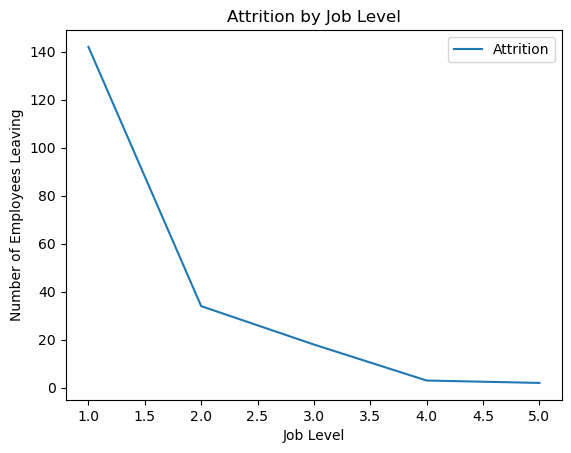

In [16]:
# Attrition by Job Level
jLevelYes=pd.DataFrame(attritionYes.groupby("JobLevel")["Attrition"].count())
jLevel = jLevelYes.plot(kind="line", xlabel="Job Level", ylabel="Number of Employees Leaving", title="Attrition by Job Level")
plt.savefig("Attrition by Job Level.png")

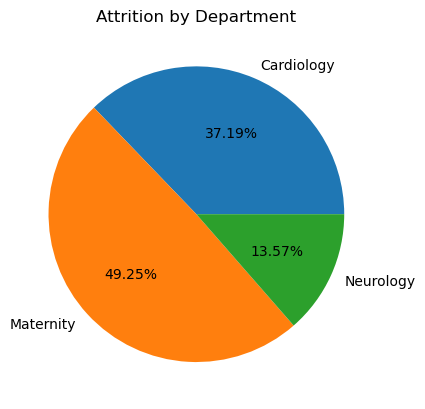

In [17]:
# Attrition by Department(Left)
departmentYes=pd.DataFrame(attritionYes.groupby("Department")["Attrition"].count())
attritionDept = departmentYes.plot(kind="pie", y="Attrition", ylabel="", title="Attrition by Department", autopct="%1.2f%%", legend=None)

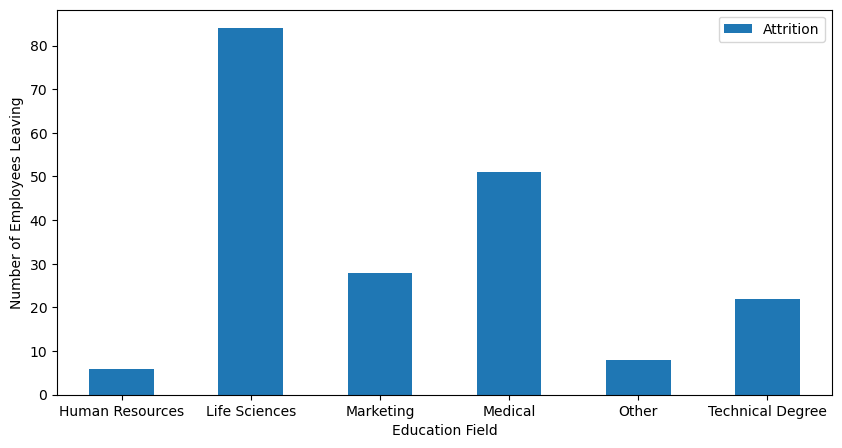

In [18]:
# Attrition by Education Field
eduYes=pd.DataFrame(attritionYes.groupby("EducationField")["Attrition"].count())
attritionEdu = eduYes.plot(kind="bar", xlabel="Education Field", ylabel="Number of Employees Leaving", figsize=(10,5), rot=0)

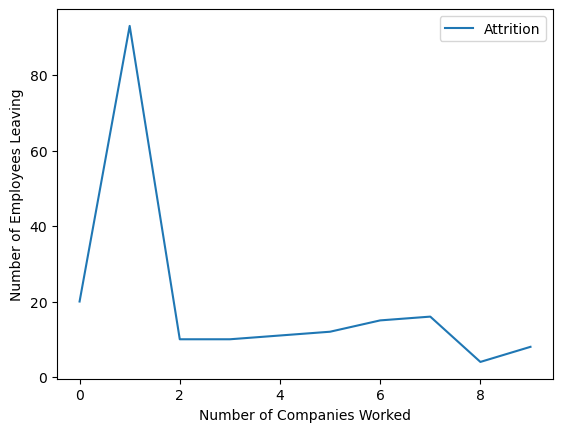

In [19]:
# Attrition by Number of Companies Worked
companiesYes=pd.DataFrame(attritionYes.groupby("NumCompaniesWorked")["Attrition"].count())
attritionPastComps = companiesYes.plot(kind="line", xlabel="Number of Companies Worked", ylabel="Number of Employees Leaving")

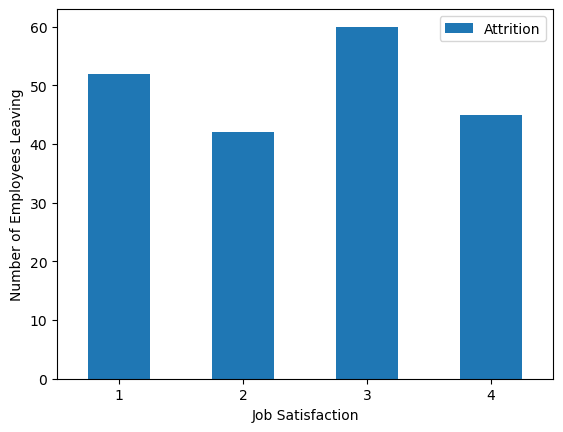

In [20]:
# Attrition by Job Satisfaction
jobYes=pd.DataFrame(attritionYes.groupby("JobSatisfaction")["Attrition"].count())
jobSat = jobYes.plot(kind="bar", xlabel="Job Satisfaction", ylabel="Number of Employees Leaving", rot=0)

<AxesSubplot:xlabel='Business Travel', ylabel='Number of Employees Leaving'>

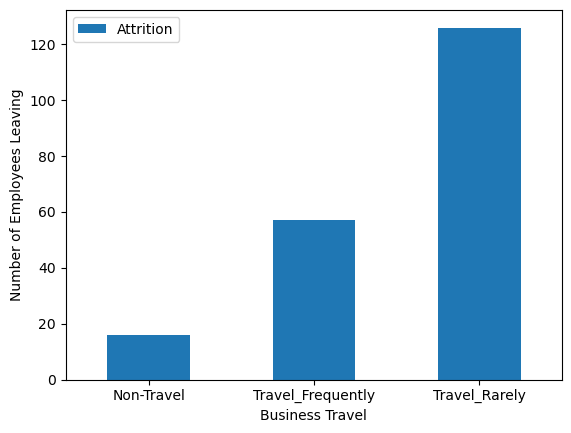

In [21]:
# Attrition by Business Travel
travelYes=pd.DataFrame(attritionYes.groupby("BusinessTravel")["Attrition"].count())
travelYes.plot(kind="bar", xlabel="Business Travel", ylabel="Number of Employees Leaving",  rot=0)

<AxesSubplot:xlabel='Distance From Home', ylabel='Number of Employees Leaving'>

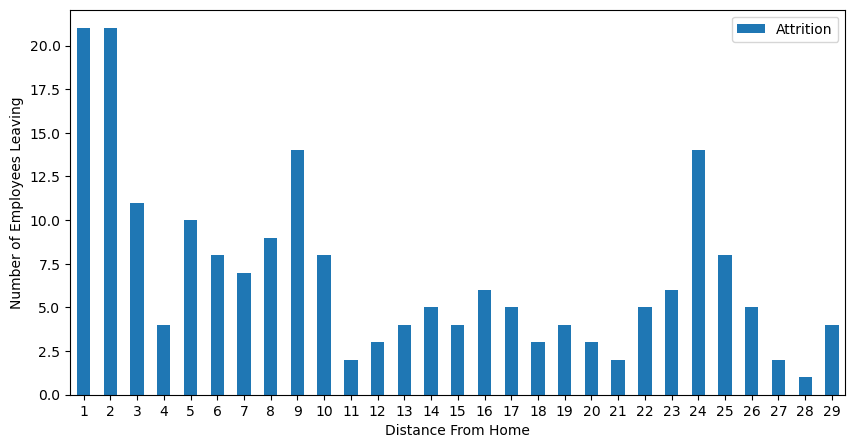

In [22]:
# Attrition by Distance from Home
distanceYes=pd.DataFrame(attritionYes.groupby("DistanceFromHome")["Attrition"].count())
distanceYes.plot(kind="bar", xlabel="Distance From Home", ylabel="Number of Employees Leaving", figsize=(10,5), rot=0)

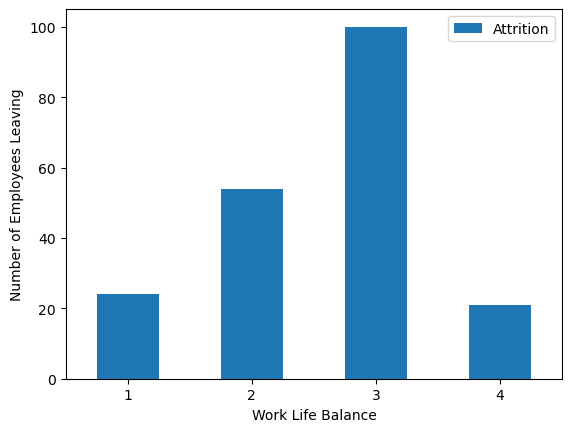

In [23]:
# Attrition by Work Life Balance
wLBYes=pd.DataFrame(attritionYes.groupby("WorkLifeBalance")["Attrition"].count())
attritionWLB = wLBYes.plot(kind="bar", xlabel="Work Life Balance", ylabel="Number of Employees Leaving", rot=0)

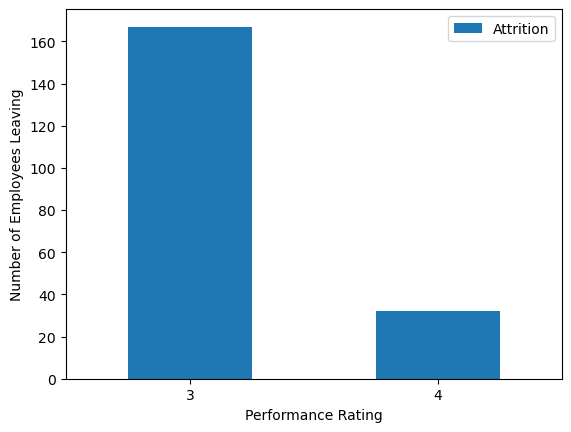

In [24]:
# Attrition by Performance Rating - Not compelling
performanceYes=pd.DataFrame(attritionYes.groupby("PerformanceRating")["Attrition"].count())
attritionPerf = performanceYes.plot(kind="bar", xlabel="Performance Rating", ylabel="Number of Employees Leaving", rot=0)

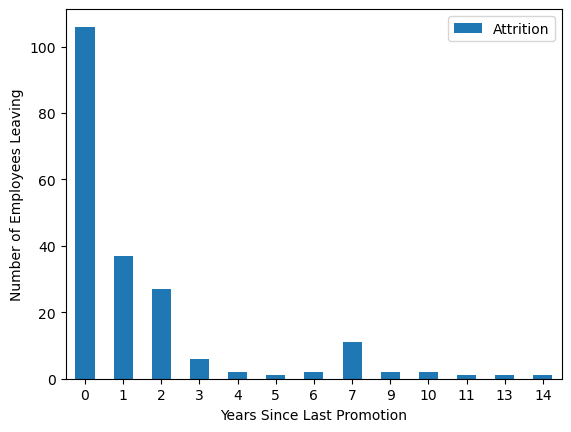

In [25]:
# Attrition by Years Since Last Promotion
promotionYes=pd.DataFrame(attritionYes.groupby("YearsSinceLastPromotion")["Attrition"].count())
attritionProm = promotionYes.plot(kind="bar", xlabel="Years Since Last Promotion", ylabel="Number of Employees Leaving", rot=0)

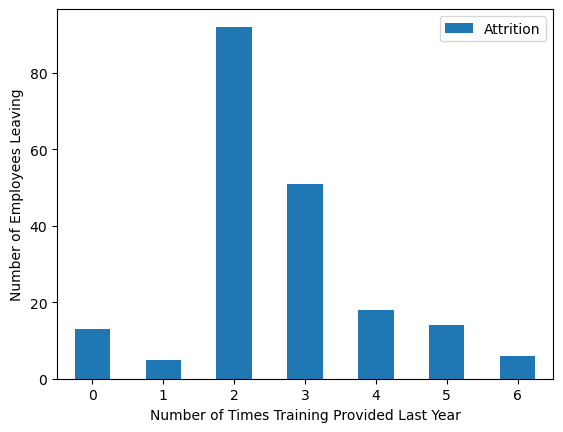

In [26]:
# Attrition by Training Times Last Year
trainingYes=pd.DataFrame(attritionYes.groupby("TrainingTimesLastYear")["Attrition"].count())
attritionTraining = trainingYes.plot(kind="bar", xlabel="Number of Times Training Provided Last Year", ylabel="Number of Employees Leaving", rot=0)

## Tenure

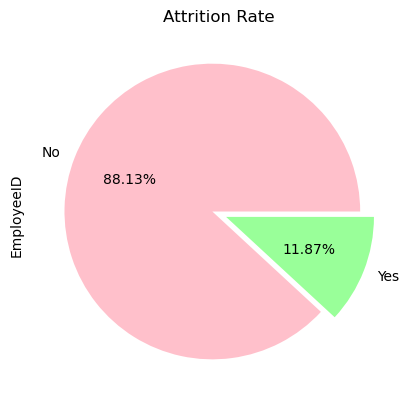

In [27]:
# Pie chart for total attrition
yes=attrition_data.groupby(["Attrition"]).count()["EmployeeID"]
colors= "pink", "#99ff99"
explode= .05, .05
graph=yes.plot(kind="pie", title= "Attrition Rate", autopct="%1.2f%%", colors=colors, explode= explode)

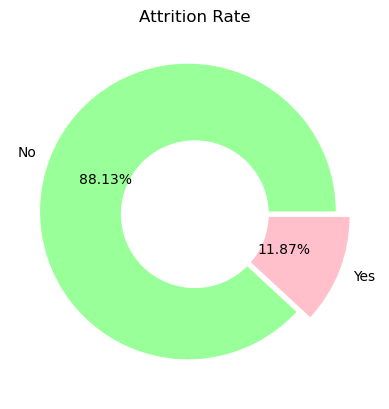

In [28]:
# Donut chart for total attrition
colors=  "#99ff99" , "pink"
explode= .05, .05
autopct="%1.2f%%"
labels= ["No", "Yes"]
plt.pie(yes,colors=colors,explode=explode, autopct=autopct,labels=labels)
plt.title ("Attrition Rate")
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf() 
fig.gca().add_artist(centre_circle)

In [29]:
# Attrition by Tenure
# copy of df
tenureDataDF = attrition_data.copy()

In [30]:
# Yes attrition values
tenureDF1 =  tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] <= 0)]
tenureResults1=  tenureDF1[(tenureDF1["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults1

18

In [31]:
tenureDF2 =  tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >0) & (tenureDataDF["YearsAtCompany"] <=1)]
tenureResults2=  tenureDF2[(tenureDF2["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults2

59

In [32]:
tenureDF3 =  tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >1) & (tenureDataDF["YearsAtCompany"] <=2)]
tenureResults3=  tenureDF3[(tenureDF3["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults3

30

In [33]:
tenureDF4 =  tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >2) & (tenureDataDF["YearsAtCompany"] <=3)]
tenureResults4= tenureDF4[(tenureDF4["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults4

17

In [34]:
tenureDF5 =  tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >3) & (tenureDataDF["YearsAtCompany"] <=4)]
tenureResults5= tenureDF5[(tenureDF5["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults5

14

In [35]:
tenureDF6 =  tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >4) & (tenureDataDF["YearsAtCompany"] <=5)]
tenureResults6= tenureDF6[(tenureDF6["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults6

19

In [36]:
tenureDF7 = tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >5) & (tenureDataDF["YearsAtCompany"] <=6)]
tenureResults7= tenureDF7[(tenureDF7["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults7

5

In [37]:
tenureDF8 = tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >6) & (tenureDataDF["YearsAtCompany"] <=7)]
tenureResults8= tenureDF8[(tenureDF8["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults8

10

In [38]:
tenureDF9 = tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >7) & (tenureDataDF["YearsAtCompany"] <=8)]
tenureResults9= tenureDF9[(tenureDF9["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults9

6

In [39]:
tenureDF10 = tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >8) & (tenureDataDF["YearsAtCompany"] <=9)]
tenureResults10= tenureDF10[(tenureDF10["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults10

3

In [40]:
tenureDF11 = tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >9) & (tenureDataDF["YearsAtCompany"] <=10)]
tenureResults11= tenureDF11[(tenureDF11["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults11

11

In [41]:
tenureDF12 = tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >10) & (tenureDataDF["YearsAtCompany"] <=11)]
tenureResults12= tenureDF12[(tenureDF12["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults12

1

In [42]:
tenureDF13 = tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >12) & (tenureDataDF["YearsAtCompany"] <=14)]
tenureResults13= tenureDF13[(tenureDF13["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults13

1

In [43]:
tenureDF14 = tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >14) & (tenureDataDF["YearsAtCompany"] <=15)]
tenureResults14= tenureDF14[(tenureDF14["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults14

2

In [44]:
tenureDF15 = tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >15) & (tenureDataDF["YearsAtCompany"] <=19)]
tenureResults15= tenureDF15[(tenureDF15["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults15

1

In [45]:
tenureDF16 = tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >19) & (tenureDataDF["YearsAtCompany"] <=23)]
tenureResults16= tenureDF16[(tenureDF16["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults16

1

In [46]:
tenureDF17 = tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >23) & (tenureDataDF["YearsAtCompany"] <=31)]
tenureResults17= tenureDF17[(tenureDF17["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureResults17

1

Dataframe for number of employees who left after x number of years working

In [47]:
attritionDF = pd.DataFrame({"0 Years at company": [tenureResults1],
                           "1 Years at company": [tenureResults2],
                            "2 Years at company": [tenureResults3],
                            "3 Years at company": [tenureResults4],
                            "4 Years at company": [tenureResults5],
                            "5 Years at company": [tenureResults6],
                            "6 Years at company": [tenureResults7],
                            "7 Years at company": [tenureResults8],
                            "8 Years at company": [tenureResults9],
                            "9 Years at company": [tenureResults10],
                            "10 Years at company": [tenureResults11],
                            "11 Years at company": [tenureResults12],
                            "14 Years at company": [tenureResults13],
                            "15 Years at company": [tenureResults14],
                            "19 Years at company": [tenureResults15],
                            "23 Years at company": [tenureResults16],
                            "31 Years at company": [tenureResults17]
                           })
attritionDF

,0 Years at company,1 Years at company,2 Years at company,3 Years at company,4 Years at company,5 Years at company,6 Years at company,7 Years at company,8 Years at company,9 Years at company,10 Years at company,11 Years at company,14 Years at company,15 Years at company,19 Years at company,23 Years at company,31 Years at company
0,18,59,30,17,14,19,5,10,6,3,11,1,1,2,1,1,1


<BarContainer object of 4 artists>

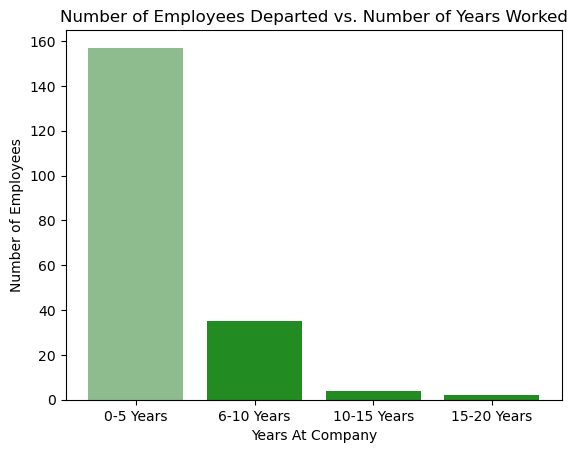

In [48]:
employees=[157,35,4,2]
xAxisPoints=np.arange(len(employees))
ticks3= [x for x in xAxisPoints]
plt.xticks(ticks3,["0-5 Years","6-10 Years", "10-15 Years", "15-20 Years"])
plt.xlabel("Years At Company")
plt.ylabel("Number of Employees")
plt.title("Number of Employees Departed vs. Number of Years Worked")
plt.bar(xAxisPoints, employees, align="center", color= ["darkseagreen","forestgreen","forestgreen","forestgreen"])

<BarContainer object of 6 artists>

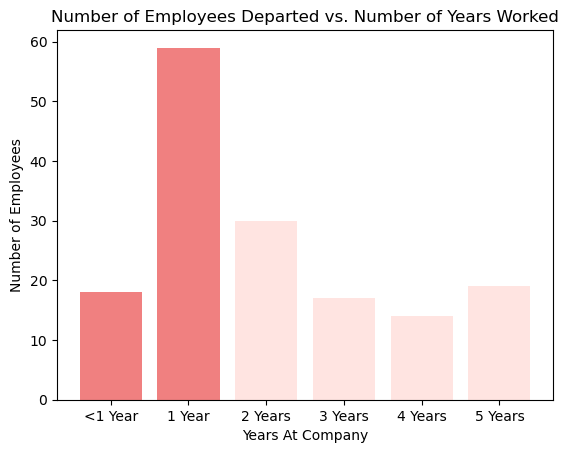

In [49]:
employees3=[18,59,30,17,14,19]
xAxisPoints3=np.arange(len(employees3))
ticks3= [x for x in xAxisPoints3]

plt.xticks(ticks3,["<1 Year", "1 Year", "2 Years", "3 Years", "4 Years", "5 Years"])
plt.xlabel("Years At Company")
plt.ylabel("Number of Employees")
plt.title("Number of Employees Departed vs. Number of Years Worked")
plt.bar(xAxisPoints3, employees3, align="center", color=["lightcoral","lightcoral","mistyrose","mistyrose","mistyrose","mistyrose"])

Percentage of employees who left after first year

In [50]:
tenureAnalysis=tenureDataDF[(tenureDataDF["YearsAtCompany"] <= 1)].count()["EmployeeID"]
tenureAnalysis
# how many employees there were in 0-1 years

241

In [51]:
tenureAnalysis1 =  tenureDataDF[(tenureDataDF["Attrition"] == "Yes") & (tenureDataDF["YearsAtCompany"] >0) & (tenureDataDF["YearsAtCompany"] <=1)]
tenureAnalysis2=  tenureAnalysis1[(tenureAnalysis1["Attrition"] == "Yes")].count()["YearsAtCompany"]
tenureAnalysis2
#how many employees left in 0-1 years

59

In [52]:
firstYear=tenureAnalysis2 / float(tenureAnalysis) * 100
firstYear
#percentage of those who left 0-1 years

24.481327800829874

No attrition data

In [53]:
tenureDF18 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] <= 0)]
tenureResults18=  tenureDF18[(tenureDF18["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults18

28

In [54]:
tenureDF19 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >0) & (tenureDataDF["YearsAtCompany"] <=1)]
tenureResults19=  tenureDF19[(tenureDF19["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults19

136

In [55]:
tenureDF20 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >1) & (tenureDataDF["YearsAtCompany"] <=2)]
tenureResults20=  tenureDF20[(tenureDF20["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults20

116

In [56]:
tenureDF21 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >2) & (tenureDataDF["YearsAtCompany"] <=3)]
tenureResults21=  tenureDF21[(tenureDF21["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults21

135

In [57]:
tenureDF22 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >3) & (tenureDataDF["YearsAtCompany"] <=4)]
tenureResults22=  tenureDF22[(tenureDF22["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults22

106

In [58]:
tenureDF23 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >4) & (tenureDataDF["YearsAtCompany"] <=5)]
tenureResults23=  tenureDF23[(tenureDF23["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults23

200

In [59]:
tenureDF24 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >5) & (tenureDataDF["YearsAtCompany"] <=6)]
tenureResults24=  tenureDF24[(tenureDF24["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults24

81

In [60]:
tenureDF25 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >6) & (tenureDataDF["YearsAtCompany"] <=7)]
tenureResults25=  tenureDF25[(tenureDF25["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults25

94

In [61]:
tenureDF26 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >7) & (tenureDataDF["YearsAtCompany"] <=8)]
tenureResults26=  tenureDF26[(tenureDF26["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults26

87

In [62]:
tenureDF27 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >8) & (tenureDataDF["YearsAtCompany"] <=9)]
tenureResults27=  tenureDF27[(tenureDF27["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults27

91

In [63]:
tenureDF28 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >9) & (tenureDataDF["YearsAtCompany"] <=10)]
tenureResults28=  tenureDF28[(tenureDF28["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults28

126

In [64]:
tenureDF29 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >10) & (tenureDataDF["YearsAtCompany"] <=11)]
tenureResults29=  tenureDF29[(tenureDF29["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults29

36

In [65]:
tenureDF30 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >11) & (tenureDataDF["YearsAtCompany"] <=12)]
tenureResults30=  tenureDF30[(tenureDF30["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults30

17

In [66]:
tenureDF31 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >12) & (tenureDataDF["YearsAtCompany"] <=13)]
tenureResults31=  tenureDF31[(tenureDF31["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults31

28

In [67]:
tenureDF32 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >13) & (tenureDataDF["YearsAtCompany"] <=14)]
tenureResults32=  tenureDF32[(tenureDF32["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults32

19

In [68]:
tenureDF33 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >14) & (tenureDataDF["YearsAtCompany"] <=15)]
tenureResults33=  tenureDF33[(tenureDF33["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults33

21

In [69]:
tenureDF34 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >15) & (tenureDataDF["YearsAtCompany"] <=16)]
tenureResults34=  tenureDF34[(tenureDF34["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults34

12

In [70]:
tenureDF35 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >16) & (tenureDataDF["YearsAtCompany"] <=17)]
tenureResults35=  tenureDF35[(tenureDF35["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults35

12

In [71]:
tenureDF36 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >17) & (tenureDataDF["YearsAtCompany"] <=18)]
tenureResults36=  tenureDF36[(tenureDF36["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults36

13

In [72]:
tenureDF37 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >18) & (tenureDataDF["YearsAtCompany"] <=19)]
tenureResults37=  tenureDF37[(tenureDF37["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults37

13

In [73]:
tenureDF38=  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >19) & (tenureDataDF["YearsAtCompany"] <=20)]
tenureResults38=  tenureDF38[(tenureDF38["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults38

32

In [74]:
tenureDF39 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >20) & (tenureDataDF["YearsAtCompany"] <=21)]
tenureResults39=  tenureDF39[(tenureDF39["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults39

17

In [75]:
tenureDF40 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >21) & (tenureDataDF["YearsAtCompany"] <=22)]
tenureResults40=  tenureDF40[(tenureDF40["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults40

19

In [76]:
tenureDF41 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >22) & (tenureDataDF["YearsAtCompany"] <=23)]
tenureResults41=  tenureDF41[(tenureDF41["Attrition"] == "No")].count()["YearsAtCompany"]
tenureResults41

1

Dataframe for number of employees who stayed after x number of years working

In [77]:
attritionDF = pd.DataFrame({"0 Years at company": [tenureResults18],
                           "1 Years at company": [tenureResults19],
                            "2 Years at company": [tenureResults20],
                            "3 Years at company": [tenureResults21],
                            "4 Years at company": [tenureResults22],
                            "5 Years at company": [tenureResults23],
                            "6 Years at company": [tenureResults24],
                            "7 Years at company": [tenureResults25],
                            "8 Years at company": [tenureResults26],
                            "9 Years at company": [tenureResults27],
                            "10 Years at company": [tenureResults28],
                            "11 Years at company": [tenureResults29],
                            "12 Years at company": [tenureResults30],
                            "13 Years at company": [tenureResults31],
                            "14 Years at company": [tenureResults32],
                            "15 Years at company": [tenureResults33],
                            "16 Years at company": [tenureResults34],
                            "17 Years at company": [tenureResults35],
                            "18 Years at company": [tenureResults36],
                            "19 Years at company": [tenureResults37],
                            "20 Years at company": [tenureResults38],
                            "21 Years at company": [tenureResults39],
                            "22 Years at company": [tenureResults40],
                            "23 Years at company": [tenureResults41]
                        
                            
                           })
attritionDF

,0 Years at company,1 Years at company,2 Years at company,3 Years at company,4 Years at company,5 Years at company,6 Years at company,7 Years at company,8 Years at company,9 Years at company,...,14 Years at company,15 Years at company,16 Years at company,17 Years at company,18 Years at company,19 Years at company,20 Years at company,21 Years at company,22 Years at company,23 Years at company
0,28,136,116,135,106,200,81,94,87,91,...,19,21,12,12,13,13,32,17,19,1


<BarContainer object of 4 artists>

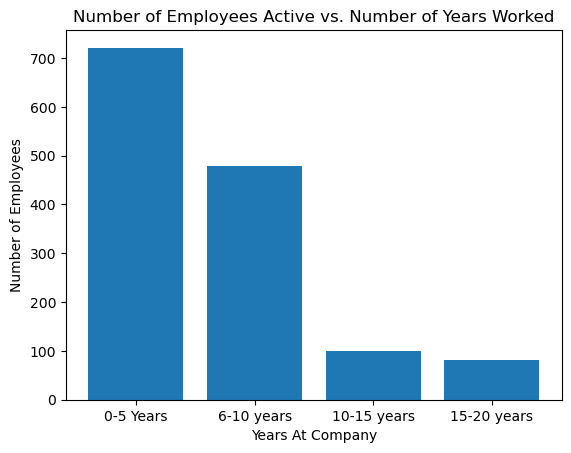

In [78]:
employees2=[721,479,100,82]
xAxisPoints2=np.arange(len(employees2))
ticks1= [x for x in xAxisPoints]
plt.xticks(ticks1,["0-5 Years","6-10 years", "10-15 years", "15-20 years"])
plt.xlabel("Years At Company")
plt.ylabel("Number of Employees")
plt.title("Number of Employees Active vs. Number of Years Worked")
plt.bar(xAxisPoints2, employees2, align="center")

<BarContainer object of 6 artists>

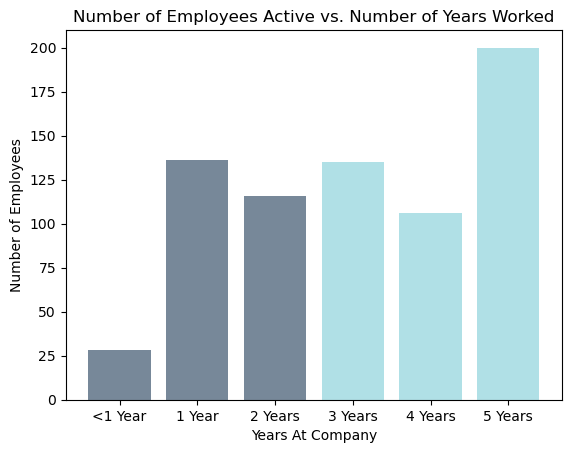

In [79]:
employees4=[28,136,116,135,106,200]
xAxisPoints4=np.arange(len(employees4))
ticks4= [x for x in xAxisPoints4]
plt.xticks(ticks3,["<1 Year", "1 Year", "2 Years", "3 Years", "4 Years", "5 Years"])
plt.xlabel("Years At Company")
plt.ylabel("Number of Employees")
plt.title("Number of Employees Active vs. Number of Years Worked")
plt.bar(xAxisPoints4, employees4, align="center", color=["lightslategray","lightslategray","lightslategray","powderblue","powderblue","powderblue"])

Percentage of those who stayed in "3 Years At Company"

In [80]:
tenureAnalysis3=tenureDataDF[(tenureDataDF["YearsAtCompany"] > 2) & (tenureDataDF ["YearsAtCompany"] <=3)]
year3Total=len(tenureAnalysis3)
year3Total
# how many employees there were in 3 years at company 

152

In [81]:
tenureAnalysis4 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >2) & (tenureDataDF["YearsAtCompany"] <=3)]
tenureAnalysis5=  tenureAnalysis4[(tenureAnalysis4["Attrition"] == "No")].count()["YearsAtCompany"]
tenureAnalysis5
# how many people stayed in "3 years at company"

135

In [82]:
year3= float(tenureAnalysis5) / year3Total * 100
year3
#percentage of those who stayed in "3 years at company"

88.81578947368422

Percentage of those who stayed in "4 Years At Company"

In [83]:
tenureAnalysis6=tenureDataDF[(tenureDataDF["YearsAtCompany"] > 3) & (tenureDataDF ["YearsAtCompany"] <=4)]
year4Total=len(tenureAnalysis6)
year4Total

120

In [84]:
tenureAnalysis7 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >3) & (tenureDataDF["YearsAtCompany"] <=4)]
tenureAnalysis8=  tenureAnalysis7[(tenureAnalysis7["Attrition"] == "No")].count()["YearsAtCompany"]
tenureAnalysis8

106

In [85]:
year4= float(tenureAnalysis8) / year4Total * 100
year4

88.33333333333333

Percentage of those who stayed in "5 Years At Company"

In [86]:
tenureAnalysis9=tenureDataDF[(tenureDataDF["YearsAtCompany"] > 4) & (tenureDataDF ["YearsAtCompany"] <=5)]
year5Total=len(tenureAnalysis9)
year5Total

219

In [87]:
tenureAnalysis10 =  tenureDataDF[(tenureDataDF["Attrition"] == "No") & (tenureDataDF["YearsAtCompany"] >4) & (tenureDataDF["YearsAtCompany"] <=5)]
tenureAnalysis11=  tenureAnalysis10[(tenureAnalysis10["Attrition"] == "No")].count()["YearsAtCompany"]
tenureAnalysis11

200

In [88]:
year5= float(tenureAnalysis11) / year5Total * 100
year5

91.32420091324201

<BarContainer object of 3 artists>

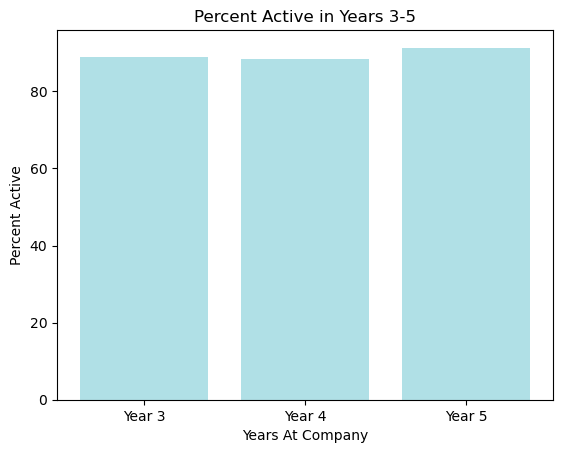

In [89]:
employees5=[year3, year4, year5]
xAxisPoints5=np.arange(len(employees5))
ticks5= [x for x in xAxisPoints5]
plt.xticks(ticks5,["Year 3", "Year 4", "Year 5"])
plt.xlabel("Years At Company")
plt.ylabel("Percent Active")
plt.title("Percent Active in Years 3-5")
plt.bar(xAxisPoints5, employees5, align="center", color=["powderblue","powderblue","powderblue"])

## Traveling Nurses vs Non-Traveling
How does overtime play into RN attrition? Patterns of gender and marital roles; any pay differences?

In [90]:
TravelN_vs_Instate = attrition_data.copy()[['Gender','MaritalStatus','BusinessTravel','DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'StandardHours', 'OverTime', 'PercentSalaryHike']]

TravelN_vs_Instate.head()

,Gender,MaritalStatus,BusinessTravel,DistanceFromHome,HourlyRate,MonthlyIncome,StandardHours,OverTime,PercentSalaryHike
0,Female,Single,Travel_Rarely,1,94,5993,80,Yes,11
1,Male,Married,Travel_Frequently,8,61,5130,80,No,23
2,Male,Single,Travel_Rarely,2,92,2090,80,Yes,15
3,Female,Married,Travel_Frequently,3,56,2909,80,Yes,11
4,Male,Married,Travel_Rarely,2,40,3468,80,No,12


## GENDER FACTOR BAR PLOTS

In [91]:
#Clean Up Male data
MaleData = TravelN_vs_Instate.loc[TravelN_vs_Instate["Gender"] == "Male", :]
MaleData.head()

,Gender,MaritalStatus,BusinessTravel,DistanceFromHome,HourlyRate,MonthlyIncome,StandardHours,OverTime,PercentSalaryHike
1,Male,Married,Travel_Frequently,8,61,5130,80,No,23
2,Male,Single,Travel_Rarely,2,92,2090,80,Yes,15
4,Male,Married,Travel_Rarely,2,40,3468,80,No,12
5,Male,Single,Travel_Frequently,2,79,3068,80,No,13
7,Male,Divorced,Travel_Rarely,24,67,2693,80,No,22


In [92]:
#MALE NURSES NOT ON OVERTIME MONTHLY INCOME BY TRAVEL 

maleOVNn=MaleData.loc[MaleData["OverTime"]=="No",:]
maleOVNn.head()

,Gender,MaritalStatus,BusinessTravel,DistanceFromHome,HourlyRate,MonthlyIncome,StandardHours,OverTime,PercentSalaryHike
1,Male,Married,Travel_Frequently,8,61,5130,80,No,23
4,Male,Married,Travel_Rarely,2,40,3468,80,No,12
5,Male,Single,Travel_Frequently,2,79,3068,80,No,13
7,Male,Divorced,Travel_Rarely,24,67,2693,80,No,22
8,Male,Single,Travel_Frequently,23,44,9526,80,No,21


In [93]:
MOVN_AGG = maleOVNn.groupby(['BusinessTravel'])[['MonthlyIncome']].agg(['mean', 'median', 'var', 'std',])
MOVN_AGG

MonthlyIncome                                   
                           mean  median           var          std
BusinessTravel                                                    
Non-Travel          5770.418367  4365.0  1.936295e+07  4400.334776
Travel_Frequently   6114.270492  4729.5  1.849916e+07  4301.064537
Travel_Rarely       6508.664706  4773.0  2.444425e+07  4944.112447

In [94]:
#MALE NURSES ON OVERTIME
maleOVYy=MaleData.loc[MaleData["OverTime"]=="Yes",:]
maleOVYy.head()

,Gender,MaritalStatus,BusinessTravel,DistanceFromHome,HourlyRate,MonthlyIncome,StandardHours,OverTime,PercentSalaryHike
2,Male,Single,Travel_Rarely,2,92,2090,80,Yes,15
14,Male,Single,Travel_Rarely,24,50,2028,80,Yes,14
16,Male,Divorced,Travel_Rarely,5,80,3298,80,Yes,12
17,Male,Divorced,Non-Travel,16,96,2935,80,Yes,13
19,Male,Single,Travel_Rarely,2,45,3944,80,Yes,11


In [95]:
MOVY_AGG = maleOVYy.groupby(['BusinessTravel'])[['MonthlyIncome']].agg(['mean', 'median', 'var', 'std',])
MOVY_AGG

MonthlyIncome                                   
                           mean  median           var          std
BusinessTravel                                                    
Non-Travel          7374.190476  6349.0  2.450012e+07  4949.759768
Travel_Frequently   6323.750000  4998.5  2.268592e+07  4762.974326
Travel_Rarely       6481.187166  5207.0  2.194008e+07  4684.024164

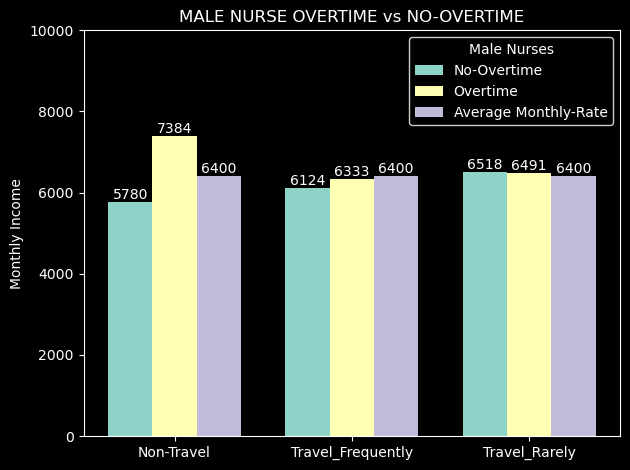

In [96]:
plt.style.use('dark_background')
maletravel = ("Non-Travel", "Travel_Frequently", "Travel_Rarely")
monthlyincome = {
    'No-Overtime': (5770, 6114, 6508),
    'Overtime': (7374, 6323,6481),
    'Average Monthly-Rate': (6390, 6390,6390),
}
x = np.arange(len(maletravel))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0
ncolors = len(plt.rcParams['axes.prop_cycle'])
fig, ax = plt.subplots(layout='tight')

for attribute, measurement in monthlyincome.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width,ncolors, label=attribute)
    ax.bar_label(rects,label_type='edge')
    multiplier += 1
   

ax.set_ylabel('Monthly Income')
ax.set_title('MALE NURSE OVERTIME vs NO-OVERTIME',fontsize=12)
ax.set_xticks(x + width, maletravel)
plt.legend(
          title="Male Nurses",
          loc="upper right",
          shadow=True,
)
ax.set_ylim(0, 10000)

plt.show()


In [97]:
#AVEREAGE MONTHLY INCLOME OF MALE NURSES
count_maleAV=round(MaleData["MonthlyIncome"].mean())
print(f"Male Nurses get payed on average ${count_maleAV}")

Male Nurses get payed on average $6390


In [98]:
#NUMBER OF MALES
count_male=MaleData['Gender']=="Male"
print(f"Total Male Nurses: {count_male.sum()} ")

#NUMBER OF MALES on OverTime
maleOVY=MaleData['OverTime']=="Yes"
print(f"Total Male Nurses on Overtime: {maleOVY.sum()}" )

#NUMBER OF MALES NOT on OverTime
maleOVN=MaleData['OverTime']=="No"
print(f"Total Male Nurses NOT on Overtime: {maleOVN.sum()} " )

count_maleM=MaleData['MaritalStatus']=="Married"
print(f"Total Male Nurses that are married: {count_maleM.sum()} ")

count_maleS=MaleData['MaritalStatus']=="Single"
print(f"Total Male Nurses that are single: {count_maleS.sum()} ")

count_maleD=MaleData['MaritalStatus']=="Divorced"
print(f"Total Male Nurses that are divorsed: {count_maleD.sum()} ")

Total Male Nurses: 998 
Total Male Nurses on Overtime: 268
Total Male Nurses NOT on Overtime: 730 
Total Male Nurses that are married: 464 
Total Male Nurses that are single: 297 
Total Male Nurses that are divorsed: 237 


In [99]:
#AVEREAGE MONTHLY INCLOME OF MALE NURSES
count_maleAV=round(MaleData["MonthlyIncome"].mean())
print(f"Male Nurses get payed on average ${count_maleAV}")

Male Nurses get payed on average $6390


In [100]:
#Clean Up Female data
FemaleData = TravelN_vs_Instate.loc[TravelN_vs_Instate["Gender"] == "Female", :]
FemaleData.head()

,Gender,MaritalStatus,BusinessTravel,DistanceFromHome,HourlyRate,MonthlyIncome,StandardHours,OverTime,PercentSalaryHike
0,Female,Single,Travel_Rarely,1,94,5993,80,Yes,11
3,Female,Married,Travel_Frequently,3,56,2909,80,Yes,11
6,Female,Married,Travel_Rarely,3,81,2670,80,Yes,20
11,Female,Single,Travel_Rarely,15,49,4193,80,Yes,12
15,Female,Divorced,Travel_Rarely,21,51,9980,80,No,11


In [101]:
#FEMALE NURSES NOT ON OVERTIME MONTHLY INCOME BY TRAVEL 

femaleOVNn=FemaleData.loc[FemaleData["OverTime"]=="No",:]
femaleOVNn.head()

,Gender,MaritalStatus,BusinessTravel,DistanceFromHome,HourlyRate,MonthlyIncome,StandardHours,OverTime,PercentSalaryHike
15,Female,Divorced,Travel_Rarely,21,51,9980,80,No,11
18,Female,Married,Travel_Rarely,2,78,15427,80,No,16
20,Female,Divorced,Non-Travel,11,96,4011,80,No,18
22,Female,Single,Travel_Rarely,7,53,11994,80,No,11
25,Female,Divorced,Travel_Rarely,5,58,19094,80,No,11


In [102]:
FOVN_AGG = femaleOVNn.groupby(['BusinessTravel'])[['MonthlyIncome']].agg(['mean', 'median', 'var', 'std'])
FOVN_AGG

MonthlyIncome                                   
                           mean  median           var          std
BusinessTravel                                                    
Non-Travel          6222.297297  5265.0  1.698488e+07  4121.271135
Travel_Frequently   5889.000000  4639.0  1.464067e+07  3826.312825
Travel_Rarely       6981.629851  5324.0  2.442790e+07  4942.458862

In [103]:
#FEMALE NURSES ON OVERTIME MONTHLY INCOME BY TRAVEL 

femaleOVYy=FemaleData.loc[FemaleData["OverTime"]=="Yes",:]
femaleOVYy.head()

,Gender,MaritalStatus,BusinessTravel,DistanceFromHome,HourlyRate,MonthlyIncome,StandardHours,OverTime,PercentSalaryHike
0,Female,Single,Travel_Rarely,1,94,5993,80,Yes,11
3,Female,Married,Travel_Frequently,3,56,2909,80,Yes,11
6,Female,Married,Travel_Rarely,3,81,2670,80,Yes,20
11,Female,Single,Travel_Rarely,15,49,4193,80,Yes,12
26,Female,Single,Travel_Frequently,16,72,3919,80,Yes,22


In [104]:
FOVY_AGG = femaleOVYy.groupby(['BusinessTravel'])[['MonthlyIncome']].agg(['mean', 'median', 'var', 'std',])
FOVY_AGG

MonthlyIncome                                   
                           mean  median           var          std
BusinessTravel                                                    
Non-Travel          7668.250000  5517.0  2.106841e+07  4590.034241
Travel_Frequently   6245.625000  4170.5  2.658373e+07  5155.941212
Travel_Rarely       6748.940789  5206.5  2.119154e+07  4603.427428

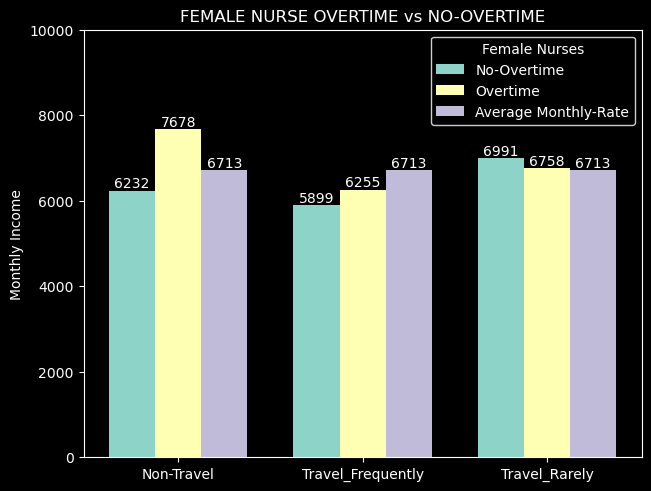

In [105]:
plt.style.use('dark_background')

colors = ["#ffffcc", "#a1dab4", "#41b6c4"]
femaletravel = ("Non-Travel", "Travel_Frequently", "Travel_Rarely")
monthlyincome = {
    'No-Overtime': (6222, 5889, 6981),
    'Overtime': (7668, 6245,6748),
    'Average Monthly-Rate': (6703, 6703,6703),
}
x = np.arange(len(femaletravel))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0
colors = ["#ffffcc", "#a1dab4", "#41b6c4"]
ncolors = len(plt.rcParams['axes.prop_cycle'])
fig, ax = plt.subplots(layout='constrained')


for attribute, measurement in monthlyincome.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width,ncolors, label=attribute)
    ax.bar_label(rects, label_type='edge')
    multiplier += 1
   
ax.set_ylabel('Monthly Income')
ax.set_title('FEMALE NURSE OVERTIME vs NO-OVERTIME',fontsize=12)
ax.set_xticks(x + width, femaletravel)
plt.legend(
          title="Female Nurses",
          loc="upper right",
          shadow=True,
)
ax.set_ylim(0, 10000)

plt.show()

In [106]:
#NUMBER OF FEMALES
count_female=FemaleData['Gender']=="Female"
print(f"Total Female Nurses: {count_female.sum()} ")

#NUMBER OF FEMALES on overtime
femaleOVY=FemaleData['OverTime']=="Yes"
print(f"Total Female Nurses on Overtime: {femaleOVY.sum()}" )

femaleOVN=FemaleData['OverTime']=="No"
print(f"Total Female Nurses NOT on Overtime: {femaleOVN.sum()} " )

count_femaleM=FemaleData['MaritalStatus']=="Married"
print(f"Total Female Nurses that are married: {count_femaleM.sum()} ")

count_femaleS=FemaleData['MaritalStatus']=="Single"
print(f"Total Female Nurses that are single: {count_femaleS.sum()} ")

count_femaleD=FemaleData['MaritalStatus']=="Divorced"
print(f"Total Female Nurses that are divorsed: {count_femaleD.sum()} ")

Total Female Nurses: 678 
Total Female Nurses on Overtime: 208
Total Female Nurses NOT on Overtime: 470 
Total Female Nurses that are married: 313 
Total Female Nurses that are single: 225 
Total Female Nurses that are divorsed: 140 


In [107]:
#AVEREAGE MONTHLY INCOME OF FEMALE NURSES 
count_femaleAV=round(FemaleData["MonthlyIncome"].mean())
print(f"Female Nurses get payed on average ${count_femaleAV}")

Female Nurses get payed on average $6703


## TRAVELERS vs NON-TRAVELERS FACTOR

In [108]:
#Clean Up non-travel data
NonTData = TravelN_vs_Instate.loc[TravelN_vs_Instate["BusinessTravel"] == "Non-Travel", :]
NonTData.head()

,Gender,MaritalStatus,BusinessTravel,DistanceFromHome,HourlyRate,MonthlyIncome,StandardHours,OverTime,PercentSalaryHike
17,Male,Divorced,Non-Travel,16,96,2935,80,Yes,13
20,Female,Divorced,Non-Travel,11,96,4011,80,No,18
46,Male,Single,Non-Travel,23,72,4568,80,No,20
53,Male,Married,Non-Travel,11,79,9884,80,Yes,13
83,Female,Divorced,Non-Travel,6,79,5329,80,Yes,12


In [109]:
#NUMBER OF NONE TRAVELERS
count_nontravel=NonTData['BusinessTravel']=="Non-Travel"
print(f"There are {count_nontravel.sum()} Nurses who don't travel for work.")

count_nontravelAVG=round(NonTData["MonthlyIncome"].mean())
print(f"Non-traveling Nurses get payed a monthly average of ${count_nontravelAVG}")

HRnontravel=round(NonTData["HourlyRate"].mean())
print(f"Non-traveling Nurse's hourly rate ${HRnontravel}")

nontravelOVY=NonTData['OverTime']=="Yes"
print(f"Total Nurses on Overtime: {nontravelOVY.sum()}" )

nontravelOVN=NonTData['OverTime']=="No"
print(f"Total Nurses NOT on Overtime: {nontravelOVN.sum()} " )

There are 172 Nurses who don't travel for work.
Non-traveling Nurses get payed a monthly average of $6240
Non-traveling Nurse's hourly rate $64
Total Nurses on Overtime: 37
Total Nurses NOT on Overtime: 135 


In [110]:
#Clean Up rare-travel data
RareData = TravelN_vs_Instate.loc[TravelN_vs_Instate["BusinessTravel"] == "Travel_Rarely", :]
RareData.head()

,Gender,MaritalStatus,BusinessTravel,DistanceFromHome,HourlyRate,MonthlyIncome,StandardHours,OverTime,PercentSalaryHike
0,Female,Single,Travel_Rarely,1,94,5993,80,Yes,11
2,Male,Single,Travel_Rarely,2,92,2090,80,Yes,15
4,Male,Married,Travel_Rarely,2,40,3468,80,No,12
6,Female,Married,Travel_Rarely,3,81,2670,80,Yes,20
7,Male,Divorced,Travel_Rarely,24,67,2693,80,No,22


In [111]:
#NUMBER OF RARE TRAVELERS
count_raretravel=RareData['BusinessTravel']=="Travel_Rarely"
print(f"There are {count_raretravel.sum()} Nurses who rarely travel for work.")

count_raretravelAVG=round(RareData["MonthlyIncome"].mean())
print(f"Rarely traveling Nurses get payed a monthly average of ${count_raretravelAVG}")

HRraretravel=round(RareData["HourlyRate"].mean())
print(f"Rarely traveling Nurse's hourly rate ${HRraretravel}")

raretravelOVY=RareData['OverTime']=="Yes"
print(f"Total Nurses on Overtime: {raretravelOVY.sum()}" )

raretravelOVN=RareData['OverTime']=="No"
print(f"Total Nurses NOT on Overtime: {raretravelOVN.sum()} " )

There are 1184 Nurses who rarely travel for work.
Rarely traveling Nurses get payed a monthly average of $6669
Rarely traveling Nurse's hourly rate $66
Total Nurses on Overtime: 339
Total Nurses NOT on Overtime: 845 


In [112]:
#Clean Up Travel_Frequently
TRFData = TravelN_vs_Instate.loc[TravelN_vs_Instate["BusinessTravel"] == "Travel_Frequently", :]
TRFData.head()

,Gender,MaritalStatus,BusinessTravel,DistanceFromHome,HourlyRate,MonthlyIncome,StandardHours,OverTime,PercentSalaryHike
1,Male,Married,Travel_Frequently,8,61,5130,80,No,23
3,Female,Married,Travel_Frequently,3,56,2909,80,Yes,11
5,Male,Single,Travel_Frequently,2,79,3068,80,No,13
8,Male,Single,Travel_Frequently,23,44,9526,80,No,21
26,Female,Single,Travel_Frequently,16,72,3919,80,Yes,22


In [113]:
#NUMBER OF FREQUENT TRAVELERS
count_fretravel=TRFData['BusinessTravel']=="Travel_Frequently"
print(f"There are {count_fretravel.sum()} Nurses who travel frequently for work.")

count_fretravelAVG=round(TRFData["MonthlyIncome"].mean())
print(f"Frequently traveling Nurses get payed a monthly average of ${count_fretravelAVG}")

HRfretravel=round(TRFData["HourlyRate"].mean())
print(f"Frequently traveling Nurse's hourly rate ${HRfretravel}")

fretravelOVY=TRFData['OverTime']=="Yes"
print(f"Total Nurses on Overtime: {fretravelOVY.sum()}" )

fretravelOVN=TRFData['OverTime']=="No"
print(f"Total Nurses NOT on Overtime: {fretravelOVN.sum()} " )

There are 320 Nurses who travel frequently for work.
Frequently traveling Nurses get payed a monthly average of $6101
Frequently traveling Nurse's hourly rate $65
Total Nurses on Overtime: 100
Total Nurses NOT on Overtime: 220 


# Travelers vs Non-Travelers Pie Chart

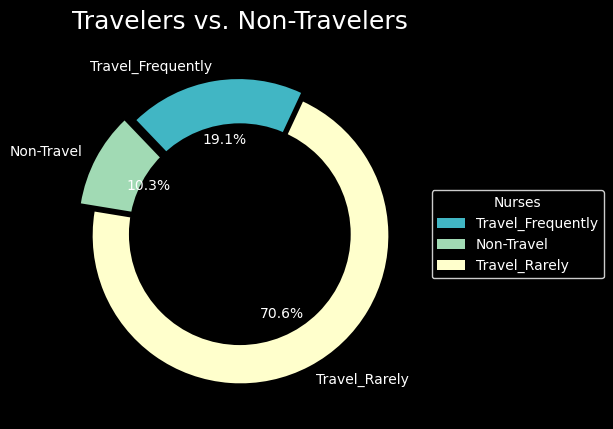

In [114]:
plt.style.use('dark_background')
labels = ['Travel_Frequently','Non-Travel', 'Travel_Rarely']
share = [320,172,1184,] 
explode = (0.05, .1, .01)  
colors = ["#41b6c4","#a1dab4","#ffffcc","#a1dab4", "#253494","#2c7fb8"]
#font_color = '#525252'
#plt.style.use('ggplot')
plt.title('Travelers vs. Non-Travelers',fontsize=18, pad=15, )
plt.pie(x=share, labels=labels,colors=colors,explode=explode, shadow=False, autopct='%1.1f%%',
         startangle=65)
plt.legend(
          title="Nurses",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          shadow=True)
# donut
circle = plt.Circle(xy=(0,0), radius=.75, facecolor='black')
plt.gca().add_artist(circle)
plt.show()

Nurse Pay

In [115]:
#employee_id : verify no duplicates

print("Number of total employee IDs listed = ", + len(attrition_data.EmployeeID))
print("Number of unique employee IDs listed = ", + attrition_data["EmployeeID"].nunique())

#attrition = [] # wether still working or not
attrition_allDF = pd.DataFrame(attrition_data.groupby("Attrition")["EmployeeID"].count())
attrition_allDF = attrition_allDF.rename(columns={"EmployeeID": "# Total Employees"})
print(attrition_allDF)


#monthly_income = [] #use this as base pay
#percent_salary_hike = [] # us for recent pay raises
#business_travel = [] # travel_rarely considered full-time, travel_frequently considered part-time or travel nurses

Number of total employee IDs listed =  1676
Number of unique employee IDs listed =  1676
           # Total Employees
Attrition                   
No                      1477
Yes                      199


# Full-Time vs. Part-Time

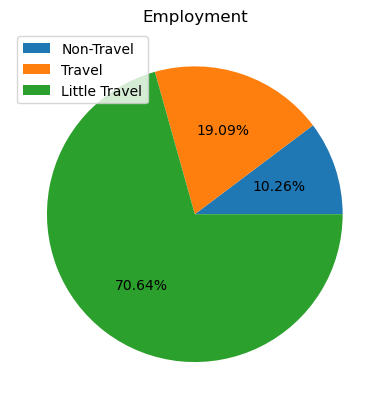

In [116]:
# FT v PT 
plt.style.use('default') # changed from black background
FtPt = pd.DataFrame(attrition_data.groupby("BusinessTravel")["EmployeeID"].count())
employment = FtPt.plot(kind="pie", y="EmployeeID", ylabel="", title="Employment", labeldistance=None, autopct="%1.2f%%")
employment.legend(["Non-Travel", "Travel", "Little Travel"])
plt.savefig("Employment_Types.png")

### Attrition of Part-Time Employees
### Part-Time Employees defined as those who travel frequently

In [117]:
# setup dataframe for just Part time employees
part_time_df = attrition_data[attrition_data.BusinessTravel == 'Travel_Frequently']
part_time_df

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
5,1633361,32,No,Travel_Frequently,1005,Maternity,2,2,Life Sciences,1,...,3,80,0,8,2,2,7,7,3,6
8,1469740,38,No,Travel_Frequently,216,Maternity,23,3,Life Sciences,1,...,2,80,0,10,2,3,9,7,1,8
26,1142062,32,Yes,Travel_Frequently,1125,Maternity,16,1,Life Sciences,1,...,2,80,0,10,5,3,10,2,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656,1855095,27,Yes,Travel_Frequently,1297,Neurology,5,2,Life Sciences,1,...,3,80,0,6,3,2,5,4,0,2
1660,1734708,31,Yes,Travel_Frequently,1060,Cardiology,1,3,Life Sciences,1,...,1,80,0,3,2,4,3,2,2,2
1662,1341748,26,Yes,Travel_Frequently,426,Neurology,17,4,Life Sciences,1,...,2,80,1,8,2,2,7,7,1,0
1665,1549806,21,Yes,Travel_Frequently,251,Neurology,10,2,Life Sciences,1,...,3,80,0,2,2,1,2,2,2,2


In [118]:
#attrition Travel Nurses; wether still working or not
attrition_travelDF = pd.DataFrame(part_time_df.groupby("Attrition")["EmployeeID"].count())
attrition_travelDF = attrition_travelDF.rename(columns={"EmployeeID": "# Travel Employees"})
print(attrition_travelDF)

           # Travel Employees
Attrition                    
No                        263
Yes                        57


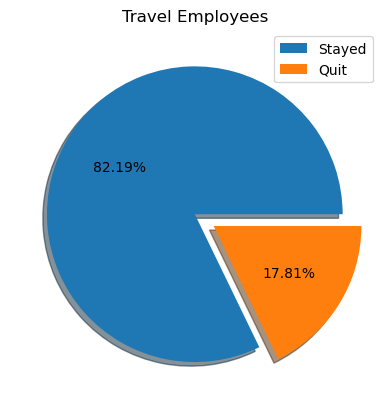

In [119]:
# Attrition Rates
yesNoPT = pd.DataFrame(part_time_df.groupby("Attrition")["EmployeeID"].count())
attritionRatesEmp = yesNoPT.plot(kind="pie", y="EmployeeID", ylabel="", title="Travel Employees", shadow=True, explode=[0,0.15], labeldistance=None, autopct="%1.2f%%")
attritionRatesEmp.legend(["Stayed", "Quit"])
plt.savefig("Travel_Attrition.png")

### Attrition of Full-Time Employes
### Full-Time Employees defined as those who travel rarely or not at all

In [120]:
## setup dataframe for just Part time employees
full_time_df = attrition_data[(attrition_data.BusinessTravel == 'Travel_Rarely') | (attrition_data.BusinessTravel == 'Non-Travel')]
full_time_df

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
6,1329390,59,No,Travel_Rarely,1324,Maternity,3,3,Medical,1,...,1,80,3,12,3,2,1,0,0,0
7,1699288,30,No,Travel_Rarely,1358,Maternity,24,1,Life Sciences,1,...,2,80,1,1,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


In [121]:
#attrition FT Nurses; wether still working or not
attrition_FTDF = pd.DataFrame(full_time_df.groupby("Attrition")["EmployeeID"].count())
attrition_FTDF = attrition_FTDF.rename(columns={"EmployeeID": "# Full Time Employees"})
print(attrition_FTDF)

           # Full Time Employees
Attrition                       
No                          1214
Yes                          142


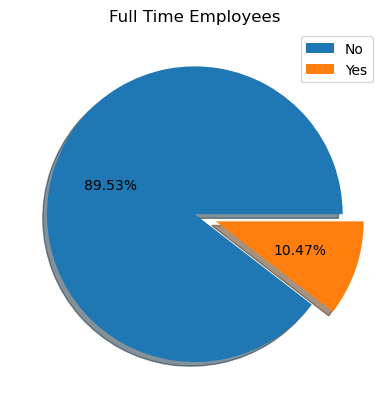

In [122]:
# Attrition Rates
yesNoFT = pd.DataFrame(full_time_df.groupby("Attrition")["EmployeeID"].count())
attritionRates = yesNoFT.plot(kind="pie", y="EmployeeID", ylabel="", title="Full Time Employees", shadow=True, explode=[0,0.15], labeldistance=None, autopct="%1.2f%%")
plt.savefig("FUll_Time_Attrition.png")

### Table of Attrition between All, Part-Time and Full-Time Employees

In [123]:
# calculate % of attrition for overall, Ft and PT
brkdn1 = pd.merge(attrition_allDF, attrition_FTDF, on="Attrition", how='outer')
brkdn = pd.merge(brkdn1, attrition_travelDF, on="Attrition", how='outer')
brkdn

,# Total Employees,# Full Time Employees,# Travel Employees
Attrition,,,
No,1477,1214,263
Yes,199,142,57


In [124]:
brkdn.reset_index()
brkdn

,# Total Employees,# Full Time Employees,# Travel Employees
Attrition,,,
No,1477,1214,263
Yes,199,142,57


In [125]:
# calculate the %s
# % Total
total_total = brkdn['# Total Employees'].sum()
print("total all employees = ", + total_total)

total_yes = brkdn.loc['Yes']['# Total Employees']
print("total all employees gone = ", + total_yes)

totalGone = (total_yes / total_total) * 100 
print("% all employees gone = ", + totalGone)



#brkdn[percent] = brkdn['# Total Employees'] / brkdn.groupby('Attrition')['# Total Employees'].sum()

total all employees =  1676
total all employees gone =  199
% all employees gone =  11.873508353221956


In [126]:
# Full Time
FT_total = brkdn['# Full Time Employees'].sum()
print("total full time employees = ", + FT_total)

FT_yes = brkdn.loc['Yes']['# Full Time Employees'] 
print("total full time employees gone = ", + FT_yes)

FTGone = (FT_yes / FT_total) * 100 
print("% Full Time employees gone = ", + FTGone)

total full time employees =  1356
total full time employees gone =  142
% Full Time employees gone =  10.471976401179942


In [127]:
# Part Time
Travel_total = attrition_travelDF["# Travel Employees"].sum()
print("total travel employees = ", + Travel_total)

Travel_yes = brkdn.loc['Yes']['# Travel Employees'] 
print("total travel employees gone = ", + Travel_yes)

TravelGone = (Travel_yes / Travel_total) * 100 
print("% Travel employees gone = ", + TravelGone)

total travel employees =  320
total travel employees gone =  57
% Travel employees gone =  17.8125


In [128]:
# add row showing percentages
brkdnformatDF = brkdn
brkdnformatDF.loc["% Gone"] = [totalGone, FTGone, TravelGone]
brkdnformatDF = brkdnformatDF.round(decimals=2)
brkdnformatDF

,# Total Employees,# Full Time Employees,# Travel Employees
Attrition,,,
No,1477.00,1214.00,263.00
Yes,199.00,142.00,57.00
% Gone,11.87,10.47,17.81


### Combined Pie Charts 
### noting income levels of those that left who were Part-Time Employees

In [129]:
attritionYesPT = part_time_df[part_time_df["Attrition"]=="Yes"].reset_index(drop=True)
attritionYesPT.head()
len(attritionYesPT)

57

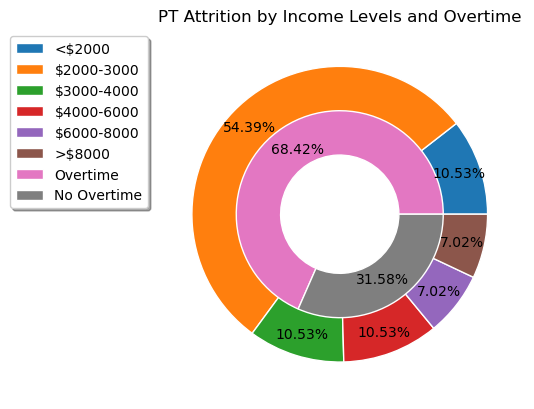

In [130]:
# bar chart - salary vs attrition vs type (ft / pt)
# Attrition by Income Levels & Overtime
# Add bins to add income levels column



incomeBinsPT = [0,2000,3000,4000,6000,8000, 20000]
incomeLabelsPT = ["<$2000", "$2000-3000", "$3000-4000", "$4000-6000", "$6000-8000", ">$8000"]
attritionYesPT["Income"] = pd.cut(attritionYesPT["MonthlyIncome"], incomeBinsPT, labels=incomeLabelsPT)

# Nested pie char
incomeYesPT=attritionYesPT.groupby("Income")["Attrition"].count()
overtimePT=attritionYesPT["OverTime"].value_counts()
iOLabelsPT = ["<$2000", "$2000-3000", "$3000-4000", "$4000-6000", "$6000-8000", ">$8000","Overtime", "No Overtime"]
fig, ax = plt.subplots()

plotPT1 = ax.pie(incomeYesPT, 
       radius=1,  
       labels=None, 
       autopct="%1.2f%%",
       pctdistance=0.85,
       wedgeprops=dict(width=0.5, edgecolor='w')) # makes it a donut

plotPT2 = ax.pie(overtimePT, 
       radius=1-0.3,
       labels=None,
       autopct="%1.2f%%",
       pctdistance=0.75,
       wedgeprops=dict(width=0.3, edgecolor='w'))

ax.set_title("PT Attrition by Income Levels and Overtime")
ax.legend(plotPT1[0] + plotPT2[0], iOLabelsPT, bbox_to_anchor=(0,0,0,1), loc="upper right", shadow=True)
plt.savefig("PT Attrition by Income Levels and Overtime")
# Note: this chart does not show an overlap between income levels and overtime


### Combined Pie Charts 
### noting income levels of those that left who were Full-Time Employees

In [131]:
attritionYesFT = full_time_df[full_time_df["Attrition"]=="Yes"].reset_index(drop=True)
attritionYesFT.head()
len(attritionYesFT)

142

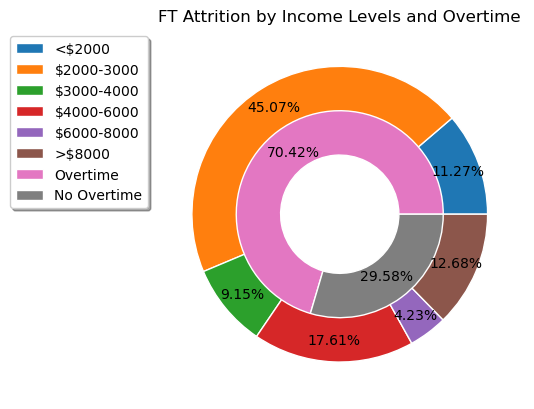

In [132]:

incomeBinsFT = [0,2000,3000,4000,6000,8000, 20000]
incomeLabelsFT = ["<$2000", "$2000-3000", "$3000-4000", "$4000-6000", "$6000-8000", ">$8000"]
attritionYesFT["Income"] = pd.cut(attritionYesFT["MonthlyIncome"], incomeBinsFT, labels=incomeLabelsFT)

# Nested pie char
incomeYesFT=attritionYesFT.groupby("Income")["Attrition"].count()
overtimeFT=attritionYesFT["OverTime"].value_counts()
iOLabelsFT = ["<$2000", "$2000-3000", "$3000-4000", "$4000-6000", "$6000-8000", ">$8000","Overtime", "No Overtime"]
fig, ax = plt.subplots()

plotFT1 = ax.pie(incomeYesFT, 
       radius=1,  
       labels=None, 
       autopct="%1.2f%%",
       pctdistance=0.85,
       wedgeprops=dict(width=0.5, edgecolor='w')) # makes it a donut

plotFT2 = ax.pie(overtimeFT, 
       radius=1-0.3,
       labels=None,
       autopct="%1.2f%%",
       pctdistance=0.75,
       wedgeprops=dict(width=0.3, edgecolor='w'))

ax.set_title("FT Attrition by Income Levels and Overtime")
ax.legend(plotFT1[0] + plotFT2[0], iOLabelsFT, bbox_to_anchor=(0,0,0,1), loc="upper right", shadow=True)
plt.savefig("FT Attrition by Income Levels and Overtime")

### Observations
1. There were almost 4 times as many full- time employees than part-time
2. A greater percentage of Part-time employees (18%) left than Full-time (10.5%).
3. The majority of Part-time employees that left made less money base with no over-time.
4. The majority of Full-time employees that left made less base money and had over-time.
5. On this limited data set analysis we could conclude that for part-time workers they left due to less mooney. But full-time workers left due to teh additional work within the same pay grade.

# RN attrition compared within other healthcare specialties

In [133]:
attrition_new_df = attrition_data.copy()[["Department", "Attrition", "EducationField", "JobRole", "Gender", "DistanceFromHome", "JobInvolvement", "JobLevel", "JobSatisfaction", "YearsAtCompany", "OverTime"]]
attrition_new_df.head(100)

,Department,Attrition,EducationField,JobRole,Gender,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,YearsAtCompany,OverTime
0,Cardiology,No,Life Sciences,Nurse,Female,1,3,2,4,6,Yes
1,Maternity,No,Life Sciences,Other,Male,8,2,2,2,10,No
2,Maternity,Yes,Other,Nurse,Male,2,2,1,3,0,Yes
3,Maternity,No,Life Sciences,Other,Female,3,3,1,3,8,Yes
4,Maternity,No,Medical,Nurse,Male,2,3,1,2,2,No
...,...,...,...,...,...,...,...,...,...,...,...
95,Neurology,No,Technical Degree,Other,Female,2,3,3,3,4,No
96,Cardiology,No,Other,Nurse,Female,3,3,2,3,3,No
97,Cardiology,No,Medical,Nurse,Male,4,3,2,3,5,No
98,Cardiology,No,Medical,Nurse,Male,10,3,4,3,37,No


### Maternity Data

In [134]:
maternity_df = attrition_new_df[(attrition_new_df["Department"] == "Maternity")]
maternity_df.head()

,Department,Attrition,EducationField,JobRole,Gender,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,YearsAtCompany,OverTime
1,Maternity,No,Life Sciences,Other,Male,8,2,2,2,10,No
2,Maternity,Yes,Other,Nurse,Male,2,2,1,3,0,Yes
3,Maternity,No,Life Sciences,Other,Female,3,3,1,3,8,Yes
4,Maternity,No,Medical,Nurse,Male,2,3,1,2,2,No
5,Maternity,No,Life Sciences,Nurse,Male,2,3,1,4,7,No


In [135]:
maternity_df_attrition = maternity_df[(maternity_df["Attrition"] == "Yes")]
maternity_df_attrition     

,Department,Attrition,EducationField,JobRole,Gender,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,YearsAtCompany,OverTime
2,Maternity,Yes,Other,Nurse,Male,2,2,1,3,0,Yes
14,Maternity,Yes,Life Sciences,Nurse,Male,24,2,1,3,4,Yes
26,Maternity,Yes,Life Sciences,Other,Female,16,1,1,1,10,Yes
34,Maternity,Yes,Medical,Other,Male,1,3,1,4,2,Yes
42,Maternity,Yes,Life Sciences,Nurse,Male,25,1,1,3,1,No
...,...,...,...,...,...,...,...,...,...,...,...
1654,Maternity,Yes,Life Sciences,Nurse,Male,3,2,1,4,0,Yes
1655,Maternity,Yes,Life Sciences,Nurse,Female,8,2,1,2,1,No
1661,Maternity,Yes,Life Sciences,Nurse,Female,15,1,1,4,5,Yes
1669,Maternity,Yes,Medical,Nurse,Male,25,2,1,2,2,Yes


In [136]:
maternity_df_educationfield = maternity_df_attrition[(maternity_df_attrition["EducationField"] == "Life Sciences")|(maternity_df_attrition["EducationField"] == "Medical")] 
maternity_df_educationfield

,Department,Attrition,EducationField,JobRole,Gender,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,YearsAtCompany,OverTime
14,Maternity,Yes,Life Sciences,Nurse,Male,24,2,1,3,4,Yes
26,Maternity,Yes,Life Sciences,Other,Female,16,1,1,1,10,Yes
34,Maternity,Yes,Medical,Other,Male,1,3,1,4,2,Yes
42,Maternity,Yes,Life Sciences,Nurse,Male,25,1,1,3,1,No
50,Maternity,Yes,Life Sciences,Nurse,Male,1,2,3,3,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...
1654,Maternity,Yes,Life Sciences,Nurse,Male,3,2,1,4,0,Yes
1655,Maternity,Yes,Life Sciences,Nurse,Female,8,2,1,2,1,No
1661,Maternity,Yes,Life Sciences,Nurse,Female,15,1,1,4,5,Yes
1669,Maternity,Yes,Medical,Nurse,Male,25,2,1,2,2,Yes


In [137]:
maternity_final = maternity_df_educationfield[(maternity_df_educationfield["JobRole"] == "Nurse")]
maternity_final.head()

,Department,Attrition,EducationField,JobRole,Gender,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,YearsAtCompany,OverTime
14,Maternity,Yes,Life Sciences,Nurse,Male,24,2,1,3,4,Yes
42,Maternity,Yes,Life Sciences,Nurse,Male,25,1,1,3,1,No
50,Maternity,Yes,Life Sciences,Nurse,Male,1,2,3,3,1,Yes
102,Maternity,Yes,Life Sciences,Nurse,Female,6,2,1,4,1,Yes
111,Maternity,Yes,Life Sciences,Nurse,Male,7,1,2,3,9,Yes


Total Count of RNs

In [138]:
maternity_final_rn = maternity_final[(maternity_final["JobRole"] == "Nurse")].count()["JobRole"]
maternity_final_rn

48

Female vs Male

In [139]:
maternity_df_female = maternity_final[(maternity_final["Gender"] == "Female")].count()["Gender"]
maternity_df_female

17

In [140]:
maternity_df_male = maternity_final[(maternity_final["Gender"] == "Male")].count()["Gender"]
maternity_df_male

31

Text(0.5, 1.0, 'Maternity RN Gender Attrition')

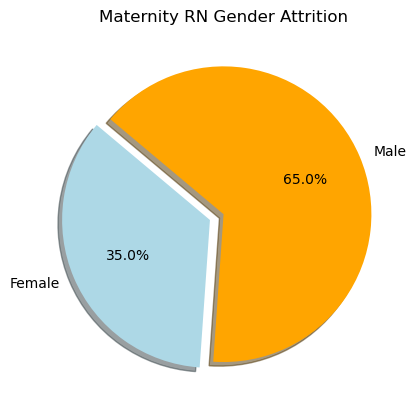

In [141]:
labels = ["Female", "Male"]

gender_breakdown = [35,65]

colors = ["lightblue", "orange"]

explode = (0.1, 0)

plt.pie(gender_breakdown, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Maternity RN Gender Attrition")

Text(0, 0.5, 'Total Percentage')

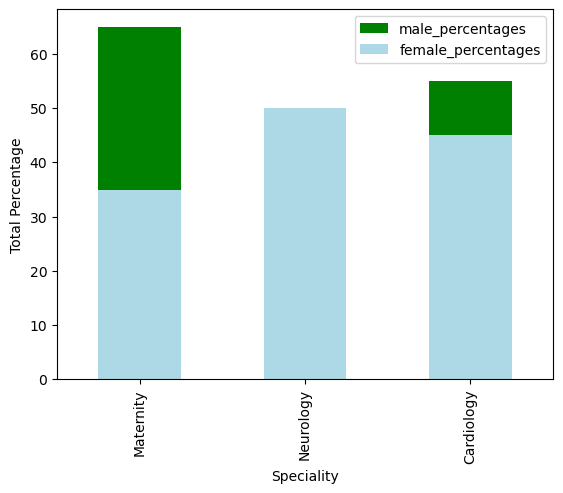

In [142]:
df = pd.DataFrame({
    'Speciality': ["Maternity", "Neurology", "Cardiology"],
    'male_percentages': [65, 50, 55],
    'female_percentages': [35, 50, 45]    
})

# plotting male data
ax = df.plot(x="Speciality", y="male_percentages", kind="bar", color="green")

# plotting female data on the same axis 
df.plot(x="Speciality", y="female_percentages", kind="bar", ax=ax, color="lightblue")
plt.ylabel("Total Percentage")

Travel Distance to Work

In [143]:
maternity_dfh_short = maternity_final[(maternity_final["DistanceFromHome"] <=7)].count()["DistanceFromHome"]
maternity_dfh_short

24

In [144]:
maternity_dfh_long = maternity_final[(maternity_final["DistanceFromHome"] >=8)].count()["DistanceFromHome"]
maternity_dfh_long

24

Text(0.5, 1.0, 'Maternity RN Travel Distance to Work')

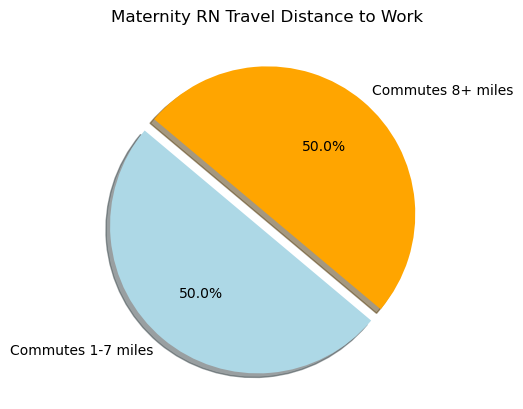

In [145]:
labels = ["Commutes 1-7 miles", "Commutes 8+ miles"]

gender_breakdown = [50,50]

colors = ["lightblue", "orange"]

explode = (0.1, 0)

plt.pie(gender_breakdown, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Maternity RN Travel Distance to Work")

Level of Job Involvement

In [146]:
maternity_job_involvement_low = maternity_final[(maternity_final["JobInvolvement"] == 1)].count()["JobInvolvement"]
maternity_job_involvement_low

6

In [147]:
maternity_job_involvement_high = maternity_final[(maternity_final["JobInvolvement"] > 1)].count()["JobInvolvement"]
maternity_job_involvement_high

42

Text(0.5, 1.0, 'Maternity RN Job Involvement')

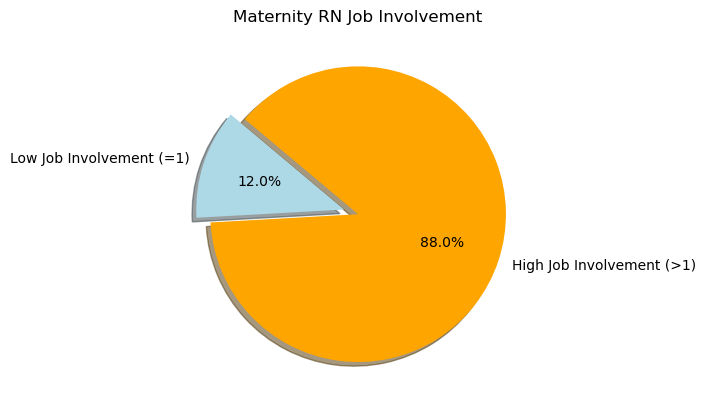

In [148]:
labels = ["Low Job Involvement (=1)", "High Job Involvement (>1)"]

gender_breakdown = [12,88]

colors = ["lightblue", "orange"]

explode = (0.1, 0)

plt.pie(gender_breakdown, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Maternity RN Job Involvement")

Job Level (1-3)

In [149]:
maternity_job_level_1 = maternity_final[(maternity_final["JobLevel"] == 1)].count()["JobLevel"]
maternity_job_level_1

43

In [150]:
maternity_job_level_2 = maternity_final[(maternity_final["JobLevel"] == 2)].count()["JobLevel"]
maternity_job_level_2

3

In [151]:
maternity_job_level_3 = maternity_final[(maternity_final["JobLevel"] == 3)].count()["JobLevel"]
maternity_job_level_3

2

Text(0, 0.5, 'Total Percentage of RNs in Job Level')

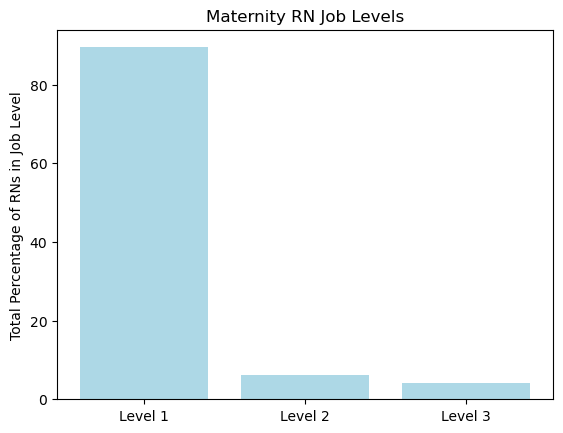

In [152]:
levels = ["Level 1", "Level 2", "Level 3"]
level_percentages = [89.5,6.25,4.25]
x_axis = np.arange(len(level_percentages))

plt.bar(x_axis, level_percentages, color="lightblue", align="center")

tick_locations = [level for level in x_axis]
plt.xticks(tick_locations, levels)


plt.title("Maternity RN Job Levels")
plt.ylabel("Total Percentage of RNs in Job Level")

Job Satisfaction (1-4)

In [153]:
maternity_job_satisfaction_low = maternity_final[(maternity_final["JobSatisfaction"] <= 2)].count()["JobSatisfaction"]
maternity_job_satisfaction_low

22

In [154]:
maternity_job_satisfaction_high = maternity_final[(maternity_final["JobSatisfaction"] >= 3)].count()["JobSatisfaction"]
maternity_job_satisfaction_high

26

Text(0.5, 1.0, 'Maternity RN Job Satisfaction')

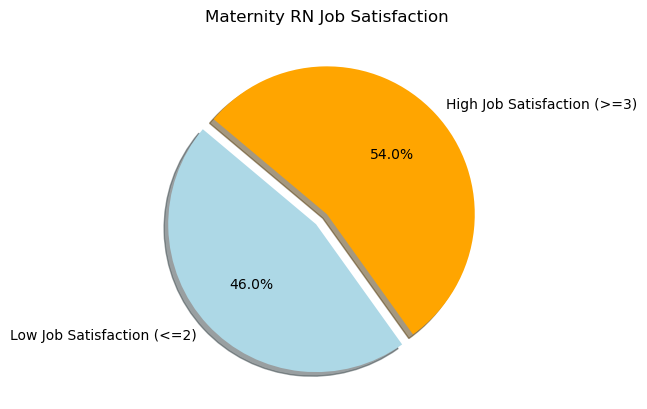

In [155]:
labels = ["Low Job Satisfaction (<=2)", "High Job Satisfaction (>=3)"]

gender_breakdown = [46,54]

colors = ["lightblue", "orange"]

explode = (0.1, 0)

plt.pie(gender_breakdown, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Maternity RN Job Satisfaction")

Tenure

In [156]:
maternity_tenure_low = maternity_final[(maternity_final["YearsAtCompany"] <= 2)].count()["YearsAtCompany"]
maternity_tenure_low

32

In [157]:
maternity_tenure_high = maternity_final[(maternity_final["YearsAtCompany"] >=3)].count()["YearsAtCompany"]
maternity_tenure_high

16

Text(0.5, 1.0, 'Maternity RN Tenure')

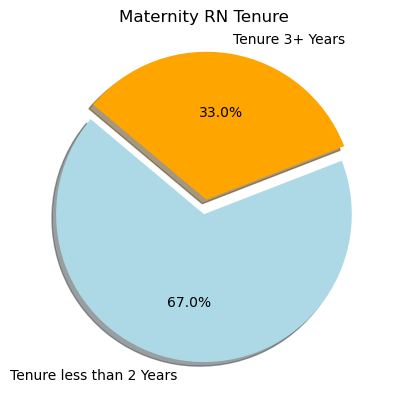

In [158]:
labels = ["Tenure less than 2 Years", "Tenure 3+ Years"]

gender_breakdown = [67,33]

colors = ["lightblue", "orange"]

explode = (0, 0.1)

plt.pie(gender_breakdown, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Maternity RN Tenure")

Overtime

In [159]:
maternity_overtime = maternity_final[(maternity_final["OverTime"] == "Yes")].count()["OverTime"]
maternity_overtime

31

Text(0.5, 1.0, 'Maternity RN Overtime')

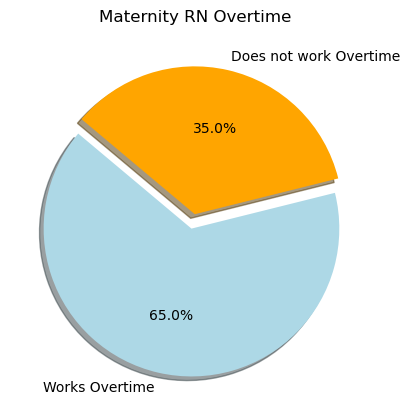

In [160]:
labels = ["Works Overtime", "Does not work Overtime"]

gender_breakdown = [65,35]

colors = ["lightblue", "orange"]

explode = (0.1, 0)

plt.pie(gender_breakdown, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Maternity RN Overtime")

### Neurology Data

In [161]:
neurology_df = attrition_new_df[(attrition_new_df["Department"] == "Neurology")]
neurology_df.head()

,Department,Attrition,EducationField,JobRole,Gender,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,YearsAtCompany,OverTime
22,Neurology,No,Life Sciences,Other,Female,7,3,3,2,12,No
25,Neurology,No,Other,Other,Female,5,3,5,3,14,No
45,Neurology,No,Technical Degree,Other,Female,12,3,5,3,22,No
55,Neurology,No,Life Sciences,Other,Female,1,3,3,4,15,Yes
59,Neurology,No,Life Sciences,Therapist,Male,1,2,2,3,7,No


In [162]:
neurology_df_attrition = neurology_df[(neurology_df["Attrition"] == "Yes")]
neurology_df_attrition.head() 

,Department,Attrition,EducationField,JobRole,Gender,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,YearsAtCompany,OverTime
100,Neurology,Yes,Human Resources,Other,Male,6,3,1,1,3,Yes
271,Neurology,Yes,Life Sciences,Other,Male,29,3,3,2,10,Yes
422,Neurology,Yes,Technical Degree,Other,Male,2,2,1,4,1,No
434,Neurology,Yes,Medical,Other,Male,15,3,3,3,7,Yes
439,Neurology,Yes,Human Resources,Other,Female,23,3,3,1,3,Yes


In [163]:
neurology_df_educationfield = neurology_df_attrition[(neurology_df_attrition["EducationField"] == "Life Sciences")|(neurology_df_attrition["EducationField"] == "Medical")] 
neurology_df_educationfield.head()

,Department,Attrition,EducationField,JobRole,Gender,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,YearsAtCompany,OverTime
271,Neurology,Yes,Life Sciences,Other,Male,29,3,3,2,10,Yes
434,Neurology,Yes,Medical,Other,Male,15,3,3,3,7,Yes
452,Neurology,Yes,Life Sciences,Other,Female,17,3,1,3,7,Yes
566,Neurology,Yes,Medical,Other,Male,2,3,5,1,5,Yes
1308,Neurology,Yes,Medical,Other,Female,14,3,1,3,0,No


In [164]:
neurology_final = neurology_df_educationfield[(neurology_df_educationfield["JobRole"] == "Nurse")]
neurology_final.head()

,Department,Attrition,EducationField,JobRole,Gender,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,YearsAtCompany,OverTime
1350,Neurology,Yes,Life Sciences,Nurse,Male,24,3,1,4,4,No
1651,Neurology,Yes,Life Sciences,Nurse,Male,2,2,1,4,1,No
1656,Neurology,Yes,Life Sciences,Nurse,Female,5,3,1,4,5,Yes
1663,Neurology,Yes,Life Sciences,Nurse,Male,6,4,1,1,0,Yes
1665,Neurology,Yes,Life Sciences,Nurse,Female,10,2,1,3,2,No


Total Count of RNs

In [165]:
neurology_df_RN = neurology_final[(neurology_final["JobRole"] == "Nurse")].count()["JobRole"]
neurology_df_RN

8

Female v Male

In [166]:
neurology_df_female = neurology_final[(neurology_final["Gender"] == "Female")].count()["Gender"]
neurology_df_female

4

In [167]:
neurology_df_male = neurology_final[(neurology_df["Gender"] == "Male")].count()["Gender"]
neurology_df_male

/var/folders/yt/328nhqkx6vzfxxr_rtx7f0mr0000gn/T/ipykernel_40549/847738561.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  neurology_df_male = neurology_final[(neurology_df["Gender"] == "Male")].count()["Gender"]


4

Text(0.5, 1.0, 'Neurology RN Gender Attrition')

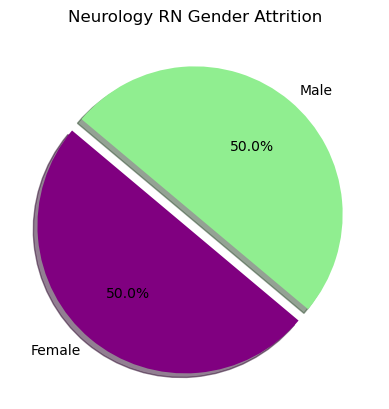

In [168]:
labels = ["Female", "Male"]

gender_breakdown = [50,50]

colors = ["purple", "lightgreen"]

explode = (0.1, 0)

plt.pie(gender_breakdown, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Neurology RN Gender Attrition")

Travel Distance to Work

In [169]:
neurology_dfh_short = neurology_final[(neurology_final["DistanceFromHome"] <=7)].count()["DistanceFromHome"]
neurology_dfh_short

5

In [170]:
neurology_dfh_long = neurology_final[(neurology_final["DistanceFromHome"] >=8 )].count()["DistanceFromHome"]
neurology_dfh_long

3

Text(0.5, 1.0, 'Neurology RN Travel Distance to Work')

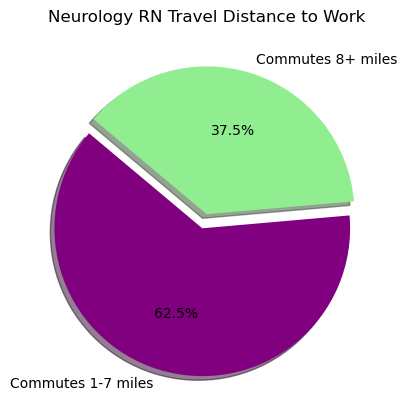

In [171]:
labels = ["Commutes 1-7 miles", "Commutes 8+ miles"]

gender_breakdown = [62.5,37.5]

colors = ["purple", "lightgreen"]

explode = (0.1, 0)

plt.pie(gender_breakdown, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Neurology RN Travel Distance to Work")

Level of Job Involvement

In [172]:
neurology_job_involvement_low = neurology_final[(neurology_final["JobInvolvement"] == 1)].count()["JobInvolvement"]
neurology_job_involvement_low

1

In [173]:
neurology_job_involvement_high = neurology_final[(neurology_final["JobInvolvement"] > 1)].count()["JobInvolvement"]
neurology_job_involvement_high

7

Text(0.5, 1.0, 'Neurology RN Job Involvement')

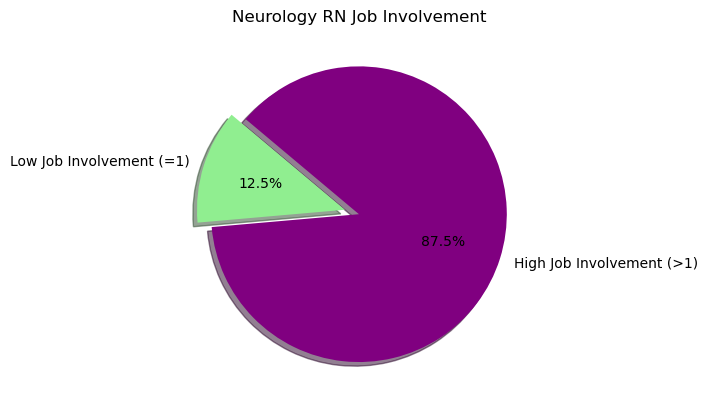

In [174]:
labels = ["Low Job Involvement (=1)", "High Job Involvement (>1)"]

gender_breakdown = [12.5,87.5]

colors = ["lightgreen", "purple"]

explode = (0.1, 0)

plt.pie(gender_breakdown, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Neurology RN Job Involvement")

Job Level (1-2)

In [175]:
neurology_job_level_1 = neurology_final[(neurology_final["JobLevel"] == 1)].count()["JobLevel"]
neurology_job_level_1

8

In [176]:
neurology_job_level_2 = neurology_final[(neurology_final["JobLevel"] == 2)].count()["JobLevel"]
neurology_job_level_2

0

Text(0, 0.5, 'Total Percentage of RNs in Job Level')

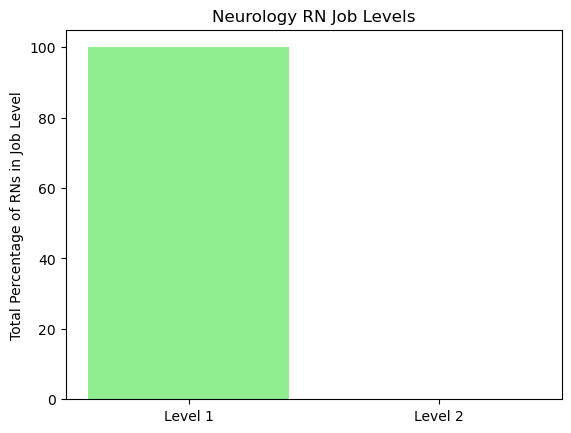

In [177]:
levels = ["Level 1", "Level 2"]
level_percentages = [100,0]
x_axis = np.arange(len(level_percentages))

plt.bar(x_axis, level_percentages, color="lightgreen", align="center")

tick_locations = [level for level in x_axis]
plt.xticks(tick_locations, levels)


plt.title("Neurology RN Job Levels")
plt.ylabel("Total Percentage of RNs in Job Level")

Job Satisfaction

In [178]:
neurology_job_satisfaction_low = neurology_final[(neurology_final["JobSatisfaction"] <= 2)].count()["JobSatisfaction"]
neurology_job_satisfaction_low

2

In [179]:
neurology_job_satisfaction_high = neurology_final[(neurology_final["JobSatisfaction"] >= 3)].count()["JobSatisfaction"]
neurology_job_satisfaction_high

6

Text(0.5, 1.0, 'Neurology RN Job Satisfaction')

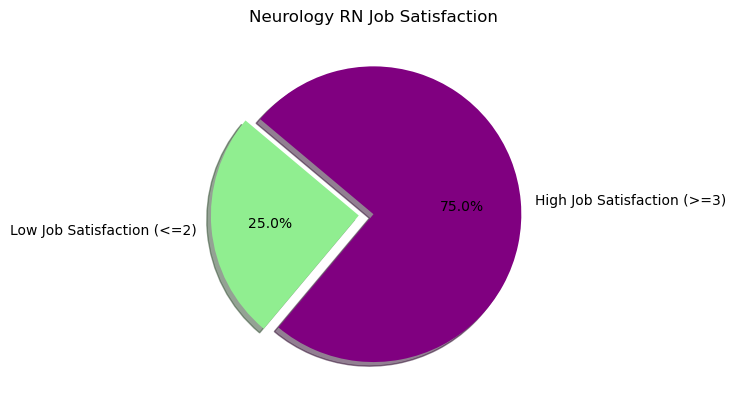

In [180]:
labels = ["Low Job Satisfaction (<=2)", "High Job Satisfaction (>=3)"]

gender_breakdown = [25,75]

colors = ["lightgreen", "purple"]

explode = (0.1, 0)

plt.pie(gender_breakdown, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Neurology RN Job Satisfaction")

Tenure

In [181]:
neurology_tenure_low = neurology_final[(neurology_final["YearsAtCompany"] <= 2)].count()["YearsAtCompany"]
neurology_tenure_low

6

In [182]:
neurology_tenure_high = neurology_final[(neurology_final["YearsAtCompany"] >=3)].count()["YearsAtCompany"]
neurology_tenure_high

2

Text(0.5, 1.0, 'Neurology RN Tenure')

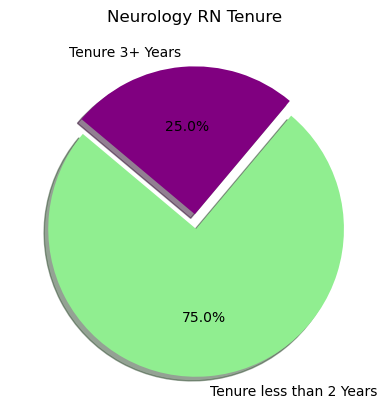

In [183]:
labels = ["Tenure less than 2 Years", "Tenure 3+ Years"]

gender_breakdown = [75,25]

colors = ["lightgreen", "purple"]

explode = (0.1, 0)

plt.pie(gender_breakdown, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Neurology RN Tenure")

Overtime

In [184]:
neurology_overtime = neurology_final[(neurology_final["OverTime"] == "Yes")].count()["OverTime"]
neurology_overtime

5

Text(0.5, 1.0, 'Neurology RN Overtime')

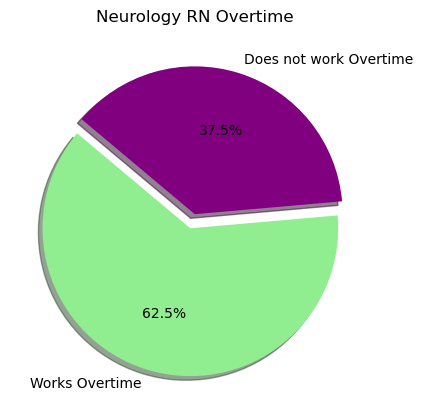

In [185]:
labels = ["Works Overtime", "Does not work Overtime"]

gender_breakdown = [62.5,37.5]

colors = ["lightgreen", "purple"]

explode = (0.1, 0)

plt.pie(gender_breakdown, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Neurology RN Overtime")

### Cardiology Data

In [186]:
cardiology_df = attrition_new_df[(attrition_new_df["Department"] == "Cardiology")]
cardiology_df.head()

,Department,Attrition,EducationField,JobRole,Gender,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,YearsAtCompany,OverTime
0,Cardiology,No,Life Sciences,Nurse,Female,1,3,2,4,6,Yes
18,Cardiology,No,Life Sciences,Administrative,Female,2,2,4,4,25,No
21,Cardiology,No,Life Sciences,Other,Male,9,2,1,1,5,No
27,Cardiology,No,Marketing,Nurse,Male,8,3,2,2,9,No
29,Cardiology,No,Marketing,Administrative,Female,2,3,5,1,2,No


In [187]:
cardiology_df_attrition = cardiology_df[(cardiology_df["Attrition"] == "Yes")]
cardiology_df_attrition.head() 

,Department,Attrition,EducationField,JobRole,Gender,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,YearsAtCompany,OverTime
36,Cardiology,Yes,Marketing,Other,Male,3,2,1,3,3,Yes
54,Cardiology,Yes,Marketing,Nurse,Female,23,2,2,4,2,Yes
107,Cardiology,Yes,Marketing,Nurse,Male,5,2,2,3,6,Yes
124,Cardiology,Yes,Life Sciences,Nurse,Male,6,1,2,3,7,Yes
127,Cardiology,Yes,Marketing,Other,Male,22,3,1,3,0,Yes


In [188]:
cardiology_df_educationfield = cardiology_df_attrition[(cardiology_df_attrition["EducationField"] == "Life Sciences")|(cardiology_df_attrition["EducationField"] == "Medical")] 
cardiology_df_educationfield.head()

,Department,Attrition,EducationField,JobRole,Gender,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,YearsAtCompany,OverTime
124,Cardiology,Yes,Life Sciences,Nurse,Male,6,1,2,3,7,Yes
132,Cardiology,Yes,Life Sciences,Nurse,Female,20,1,2,3,2,Yes
136,Cardiology,Yes,Life Sciences,Therapist,Male,8,1,3,4,4,No
301,Cardiology,Yes,Medical,Other,Female,10,2,1,3,0,No
327,Cardiology,Yes,Medical,Nurse,Female,3,3,2,3,1,Yes


In [189]:
cardiology_final = cardiology_df_educationfield[(cardiology_df_educationfield["JobRole"] == "Nurse")]
cardiology_final.head(25)

,Department,Attrition,EducationField,JobRole,Gender,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,YearsAtCompany,OverTime
124,Cardiology,Yes,Life Sciences,Nurse,Male,6,1,2,3,7,Yes
132,Cardiology,Yes,Life Sciences,Nurse,Female,20,1,2,3,2,Yes
327,Cardiology,Yes,Medical,Nurse,Female,3,3,2,3,1,Yes
502,Cardiology,Yes,Life Sciences,Nurse,Female,26,3,2,1,1,No
564,Cardiology,Yes,Life Sciences,Nurse,Female,27,4,2,3,5,Yes
693,Cardiology,Yes,Life Sciences,Nurse,Male,1,2,3,3,14,No
704,Cardiology,Yes,Life Sciences,Nurse,Female,24,4,4,2,1,Yes
745,Cardiology,Yes,Medical,Nurse,Male,29,1,2,1,2,No
833,Cardiology,Yes,Life Sciences,Nurse,Female,23,2,3,1,11,No
944,Cardiology,Yes,Life Sciences,Nurse,Male,5,3,3,2,8,Yes


Total Count of RNs

In [190]:
cardiology_df_RN = cardiology_final[(cardiology_final["JobRole"] == "Nurse")].count()["JobRole"]
cardiology_df_RN

20

Female vs Male

In [191]:
cardiology_df_female = cardiology_final[(cardiology_final["Gender"] == "Female")].count()["Gender"]
cardiology_df_female

9

In [192]:
cardiology_df_male = cardiology_final[(cardiology_final["Gender"] == "Male")].count()["Gender"]
cardiology_df_male

11

Text(0.5, 1.0, 'Cardiology RN Gender Attrition')

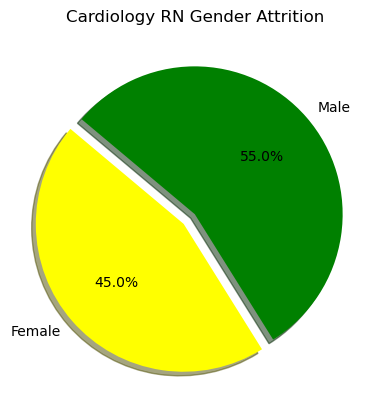

In [193]:
labels = ["Female", "Male"]

gender_breakdown = [45,55]

colors = ["yellow", "green"]

explode = (0.1, 0)

plt.pie(gender_breakdown, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Cardiology RN Gender Attrition")

Travel Distance to Work

In [194]:
cardiology_dfh_short = cardiology_final[(cardiology_final["DistanceFromHome"] <=7)].count()["DistanceFromHome"]
cardiology_dfh_short

5

In [195]:
cardiology_dfh_long = cardiology_final[(cardiology_final["DistanceFromHome"] >=8)].count()["DistanceFromHome"]
cardiology_dfh_long

15

Text(0.5, 1.0, 'Cardiology RN Travel Distance to Work')

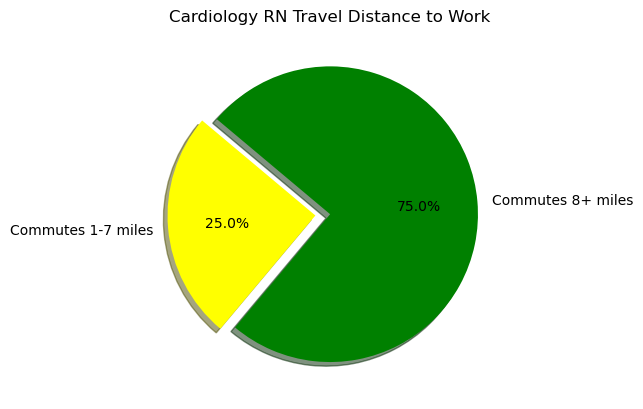

In [196]:
labels = ["Commutes 1-7 miles", "Commutes 8+ miles"]

gender_breakdown = [25,75]

colors = ["yellow", "green"]

explode = (0.1, 0)

plt.pie(gender_breakdown, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Cardiology RN Travel Distance to Work")

Level of Job Involvement

In [197]:
cardiology_job_involvement_low = cardiology_final[(cardiology_final["JobInvolvement"] == 1)].count()["JobInvolvement"]
cardiology_job_involvement_low

7

In [198]:
cardiology_job_involvement_high = cardiology_final[(cardiology_final["JobInvolvement"] > 1)].count()["JobInvolvement"]
cardiology_job_involvement_high

13

Text(0.5, 1.0, 'Cardiology RN Job Involvement')

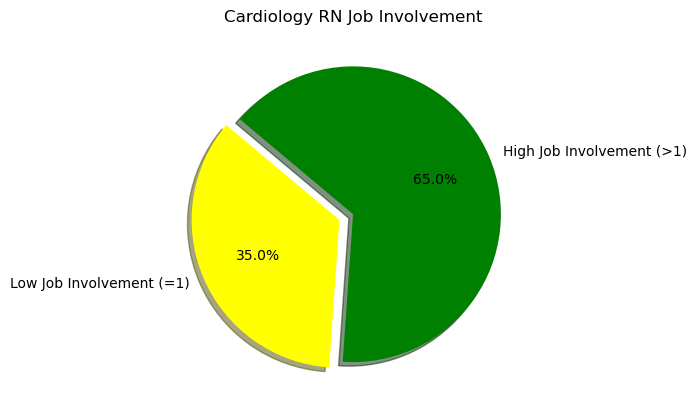

In [199]:
labels = ["Low Job Involvement (=1)", "High Job Involvement (>1)"]

gender_breakdown = [35,65]

colors = ["yellow", "green"]

explode = (0.1, 0)

plt.pie(gender_breakdown, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Cardiology RN Job Involvement")

Job Level (1-4)

In [200]:
cardiology_job_level_1 = cardiology_final[(cardiology_final["JobLevel"] == 1)].count()["JobLevel"]
cardiology_job_level_1

0

In [201]:
cardiology_job_level_2 = cardiology_final[(cardiology_final["JobLevel"] == 2)].count()["JobLevel"]
cardiology_job_level_2

12

In [202]:
cardiology_job_level_3 = cardiology_final[(cardiology_final["JobLevel"] == 3)].count()["JobLevel"]
cardiology_job_level_3

6

In [203]:
cardiology_job_level_4 = cardiology_final[(cardiology_final["JobLevel"] == 4)].count()["JobLevel"]
cardiology_job_level_4

2

Text(0, 0.5, 'Total Percentage of RNs in Job Level')

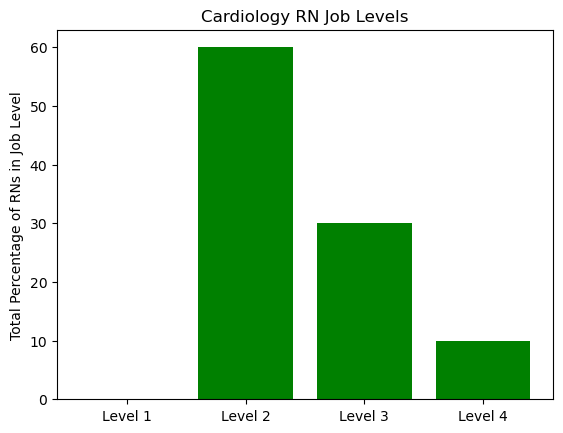

In [204]:
levels = ["Level 1", "Level 2", "Level 3", "Level 4"]
level_percentages = [0, 60, 30, 10]
x_axis = np.arange(len(level_percentages))

plt.bar(x_axis, level_percentages, color="green", align="center")

tick_locations = [level for level in x_axis]
plt.xticks(tick_locations, levels)


plt.title("Cardiology RN Job Levels")
plt.ylabel("Total Percentage of RNs in Job Level")

Job Satisfaction

In [205]:
cardiology_job_satisfaction_low = cardiology_final[(cardiology_final["JobSatisfaction"] <= 2)].count()["JobSatisfaction"]
cardiology_job_satisfaction_low

12

In [206]:
cardiology_job_satisfaction_high = cardiology_final[(cardiology_final["JobSatisfaction"] >= 3)].count()["JobSatisfaction"]
cardiology_job_satisfaction_high

8

Text(0.5, 1.0, 'Cardiology RN Job Satisfaction')

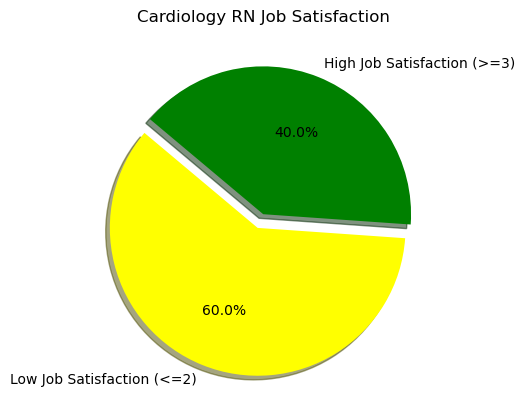

In [207]:
labels = ["Low Job Satisfaction (<=2)", "High Job Satisfaction (>=3)"]

gender_breakdown = [60,40]

colors = ["yellow", "green"]

explode = (0.1, 0)

plt.pie(gender_breakdown, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Cardiology RN Job Satisfaction")

Tenure

In [208]:
cardiology_tenure_low = cardiology_final[(cardiology_final["YearsAtCompany"] <= 2)].count()["YearsAtCompany"]
cardiology_tenure_low

10

In [209]:
cardiology_tenure_high = cardiology_final[(cardiology_final["YearsAtCompany"] >= 3)].count()["YearsAtCompany"]
cardiology_tenure_high

10

Text(0.5, 1.0, 'Cardiology RN Tenure')

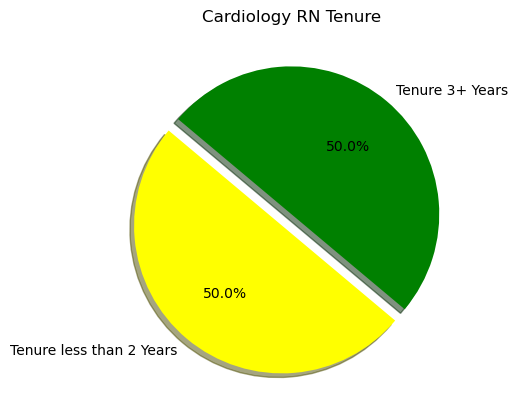

In [210]:
labels = ["Tenure less than 2 Years", "Tenure 3+ Years"]

gender_breakdown = [50,50]

colors = ["yellow", "green"]

explode = (0.1, 0)

plt.pie(gender_breakdown, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Cardiology RN Tenure")

Overtime

In [211]:
cardiology_overtime = cardiology_final[(cardiology_final["OverTime"] == "Yes")].count()["OverTime"]
cardiology_overtime

13

Text(0.5, 1.0, 'Cardiology RN Overtime')

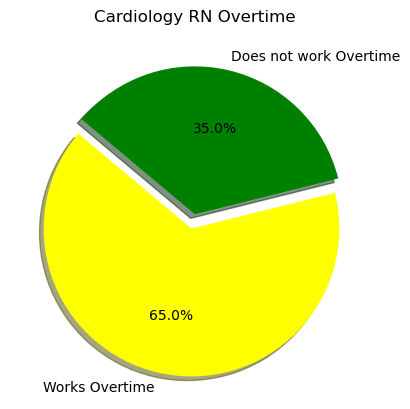

In [212]:
labels = ["Works Overtime", "Does not work Overtime"]

gender_breakdown = [65,35]

colors = ["yellow", "green"]

explode = (0.1, 0)

plt.pie(gender_breakdown, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Cardiology RN Overtime")

Text(0.5, 1.0, 'Overtime Worked by Speciality')

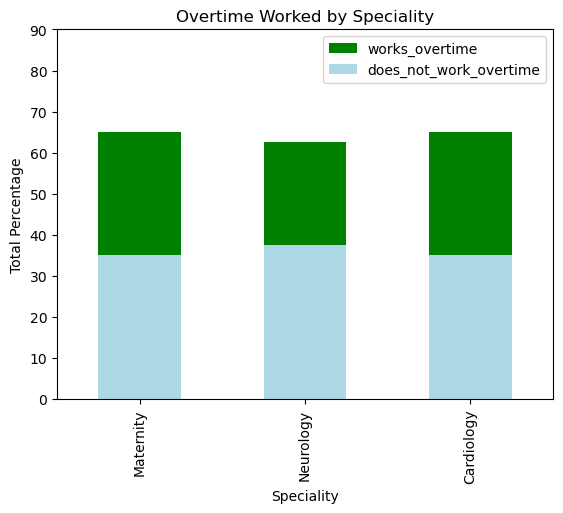

In [213]:
df = pd.DataFrame({
    'Speciality': ["Maternity", "Neurology", "Cardiology"],
    'works_overtime': [65, 62.5, 65],
    'does_not_work_overtime': [35, 37.5, 35]    
})

# plotting male data
ax = df.plot(x="Speciality", y="works_overtime", kind="bar", color="green", ylim=(0,90))

# plotting female data on the same axis 
df.plot(x="Speciality", y="does_not_work_overtime", kind="bar", ax=ax, color="lightblue")
plt.ylabel("Total Percentage")
plt.title("Overtime Worked by Speciality")

Text(0.5, 1.0, 'Tenure by Speciality')

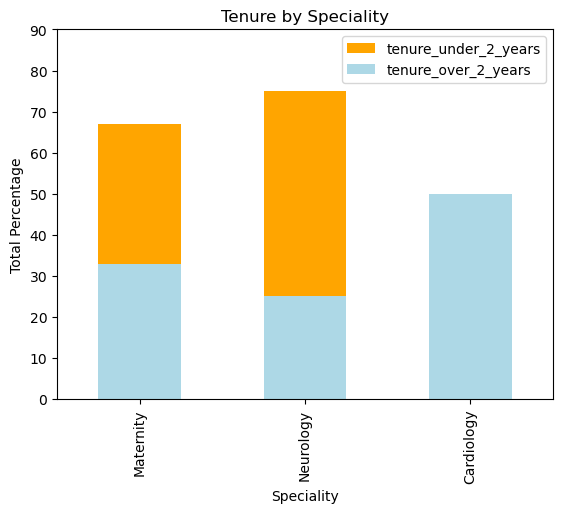

In [214]:
df = pd.DataFrame({
    'Speciality': ["Maternity", "Neurology", "Cardiology"],
    'tenure_under_2_years': [67, 75, 50],
    'tenure_over_2_years': [33, 25, 50]    
})

# plotting male data
ax = df.plot(x="Speciality", y="tenure_under_2_years", kind="bar", color="orange", ylim=(0,90))

# plotting female data on the same axis 
df.plot(x="Speciality", y="tenure_over_2_years", kind="bar", ax=ax, color="lightblue")
plt.ylabel("Total Percentage")
plt.title("Tenure by Speciality")

Total RN Count included in the Sample (Maternity, Neurology, Cardiology)-BAR

Text(0, 0.5, 'Total N0 of RNs')

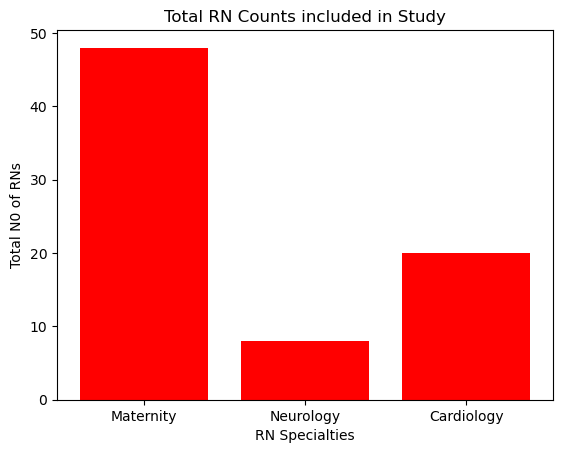

In [215]:
levels = ["Maternity", "Neurology", "Cardiology"]
level_percentages = [48, 8, 20]
x_axis = np.arange(len(level_percentages))

plt.bar(x_axis, level_percentages, color="red", align="center")

tick_locations = [level for level in x_axis]
plt.xticks(tick_locations, levels)


plt.title("Total RN Counts included in Study")
plt.xlabel("RN Specialties")
plt.ylabel("Total N0 of RNs")

Total RN Count included in the Sample (Maternity, Neurology, Cardiology)-PIE

Text(0.5, 1.0, 'Total RN Counts by Specialty included in Study')

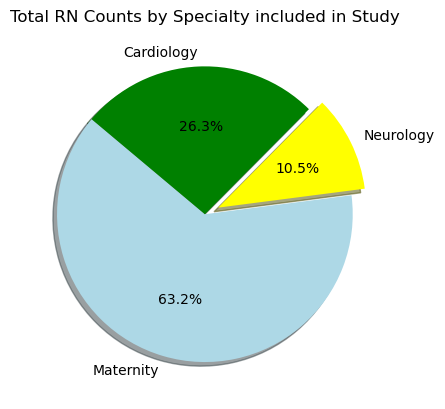

In [216]:
labels = ["Maternity", "Neurology", "Cardiology"]

gender_breakdown = [48, 8, 20]

colors = ["lightblue", "yellow", "green"]

explode = (0, 0.1, 0)

plt.pie(gender_breakdown, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Total RN Counts by Specialty included in Study")

In [1]:
# Creating dependencies
import pandas as pd 
import matplotlib.pyplot as plt
hpDF = pd.read_csv("Employee Attrition for Healthcare/Healthcare-Employee-Attrition.csv")

In [2]:
# Displaying dataframe
hpDF.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Displaying columns in dataframe.
hpDF.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
# Displaying the attrition count using the Counter function
from collections import Counter

print(dict(Counter(hpDF['Attrition'])))

{'Yes': 237, 'No': 1233}


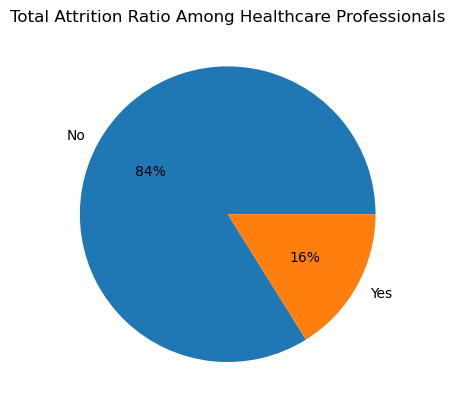

In [5]:
# Displaying the attrition rate as a pie chart
keys = ['No', 'Yes']
data = [1233, 237]

plt.pie(data, labels = keys, autopct='%.0f%%')
plt.title("Total Attrition Ratio Among Healthcare Professionals")
plt.show()

In [6]:
# Defining a dictionary based on attrition count.
# Plotting a pie chart on attrition rate based on gender 
def get_pie_chart(hpDF, categorical_column, categorical_value):
        df_category = hpDF[hpDF[categorical_column] == categorical_value].copy()
        attrition_dict = dict(Counter(df_category['Attrition']))

        keys = list(attrition_dict.keys())
        data = list(attrition_dict.values())

        plt.pie(data, labels = keys, autopct='%.0f%%')
        plt.title(f"Attrition for {categorical_value}")
        plt.show()

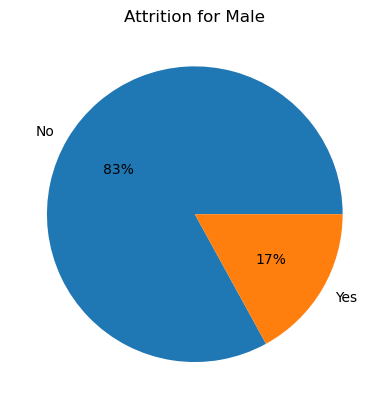

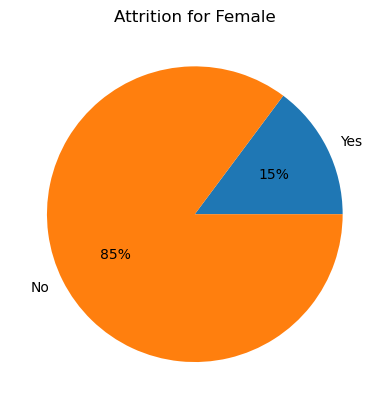

In [7]:
# Displaying the pie chart
get_pie_chart(hpDF, 'Gender', 'Male')
get_pie_chart(hpDF, 'Gender', 'Female')

In [8]:
# Utilizing seaborn dependency to display visually robust informative statistical graphics

import seaborn as sb

# Defining the variables to create a bivariate histoplot to show the 
# distributions of attrition rate  based on monthly income
def get_attrition_box_plot(hpDF, numerical_column):
    sb.boxplot(x= hpDF['Attrition'], y = df_in[numerical_column])
    plt.show()

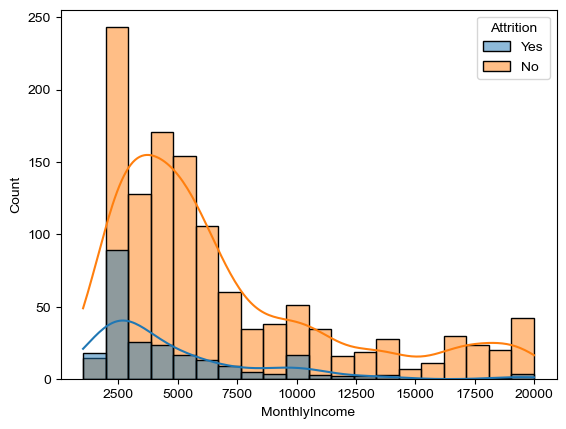

In [9]:
# Displaying the histogram
sb.histplot(data=hpDF, x="MonthlyIncome", hue="Attrition", kde=True)

sb.set()

In [10]:
# Created a new csv file keeping only the datapoints that are positive for attrition and based on the columns of interest
# Created dataframe based on new csv file
hp_newDF = "Employee Attrition for Healthcare/HPmodified_AttritionOnly.csv"

In [11]:
# read new csv
hp_newDF = pd.read_csv(hp_newDF)
hp_newDF.head()

,Age,BusinessTravel,Department,DistanceFromHome,EducationField,Gender,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,OverTime,YearsAtCompany
0,26,Non-Travel,Sales,29,Medical,Male,2,Sales Executive,1,4969,No,2
1,31,Travel_Frequently,Research & Development,29,Medical,Male,1,Laboratory Technician,2,3479,No,5
2,33,Travel_Frequently,Research & Development,29,Medical,Female,2,Research Scientist,3,4508,No,13
3,38,Travel_Rarely,Research & Development,29,Medical,Male,2,Healthcare Representative,1,6673,Yes,1
4,47,Non-Travel,Research & Development,29,Life Sciences,Male,3,Manager,2,11849,Yes,10


In [12]:
# Displaying the columns in the new dataframe
hp_newDF.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MonthlyIncome', 'OverTime', 'YearsAtCompany'],
      dtype='object')

In [13]:
# statistical description of data
hp_newDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,152.0,34.052632,9.759213,18.0,28.00,32.0,39.25,58.0
DistanceFromHome,152.0,10.506579,8.669805,1.0,2.75,9.0,16.25,29.0
JobLevel,152.0,1.605263,0.914619,1.0,1.00,1.0,2.00,5.0
JobSatisfaction,152.0,2.434211,1.119786,1.0,1.00,3.0,3.00,4.0
MonthlyIncome,152.0,4653.855263,3479.143389,1009.0,2379.25,3368.0,5533.25,19859.0
YearsAtCompany,152.0,5.131579,5.857790,0.0,1.00,3.0,7.25,40.0


In [14]:
# checking dataset info
hp_newDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               152 non-null    int64 
 1   BusinessTravel    152 non-null    object
 2   Department        152 non-null    object
 3   DistanceFromHome  152 non-null    int64 
 4   EducationField    152 non-null    object
 5   Gender            152 non-null    object
 6   JobLevel          152 non-null    int64 
 7   JobRole           152 non-null    object
 8   JobSatisfaction   152 non-null    int64 
 9   MonthlyIncome     152 non-null    int64 
 10  OverTime          152 non-null    object
 11  YearsAtCompany    152 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 14.4+ KB


In [15]:
# Defining a variable and creating conditions to seperate the categorical and continuous variables
def cat_con_split(hp_newDF):
    cat, con = [], []
    for i in hp_newDF.columns:
        if hp_newDF[i].dtype=='object':
            cat.append(i)
        else:
            con.append(i)
    return cat, con

In [16]:
cat,con = cat_con_split(hp_newDF)

In [17]:
# Displaying the categorical variables
cat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'OverTime']

In [18]:
# Displaying the continuous variables
con

['Age',
 'DistanceFromHome',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'YearsAtCompany']

# Data Analysis

## Analysis of Distribution in Each Variable

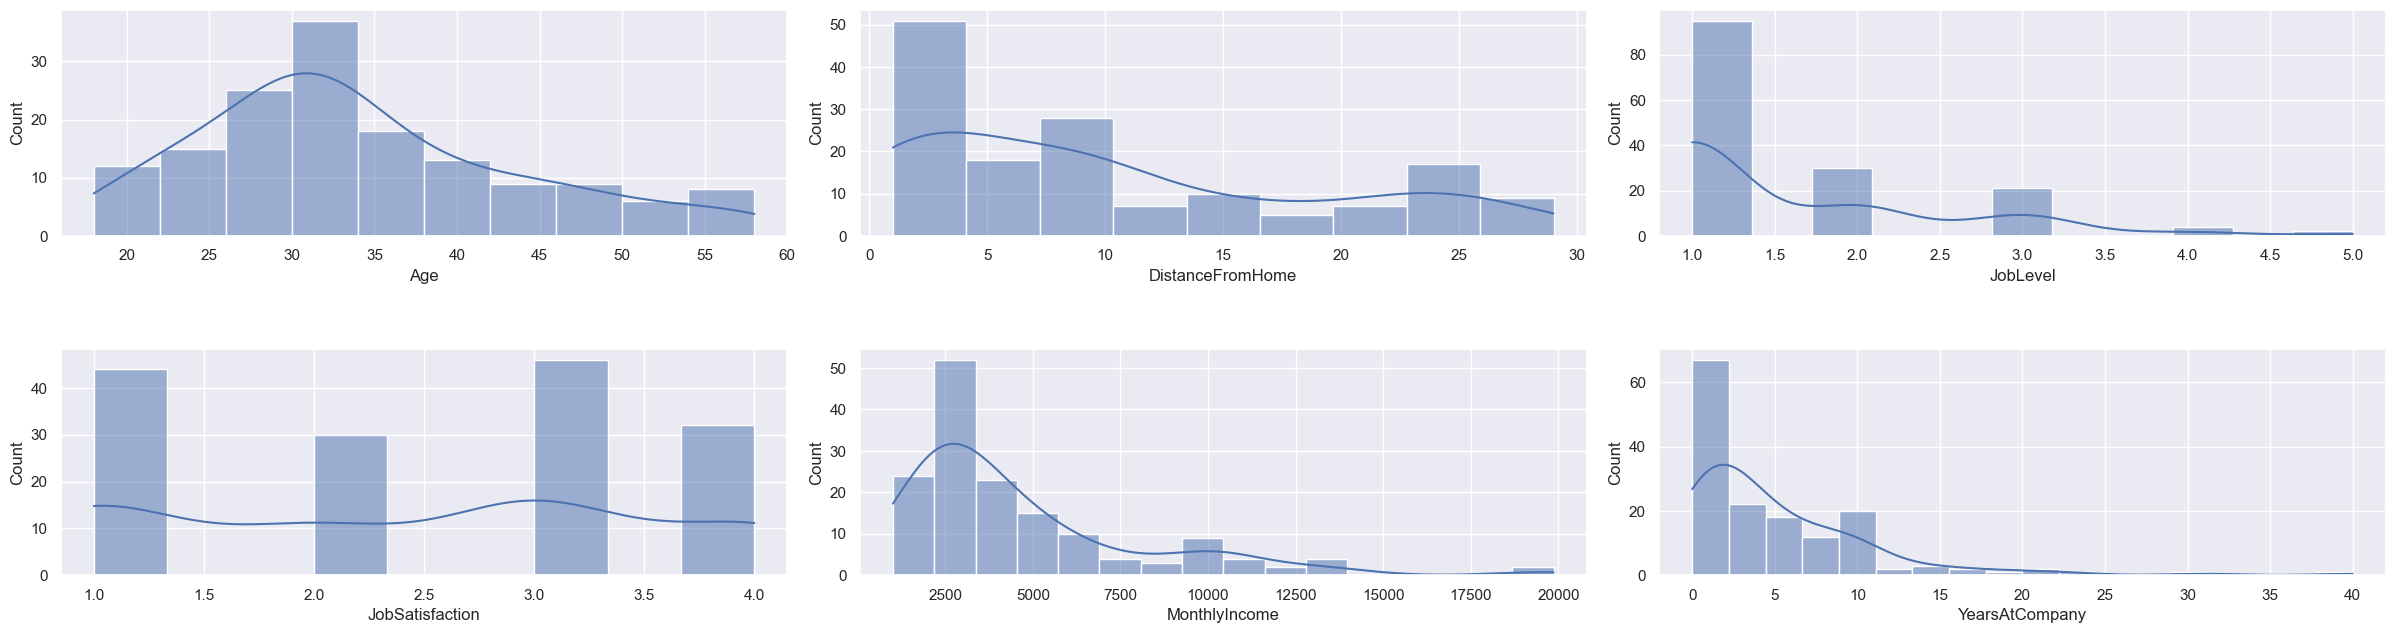

In [19]:
# analysis of continuous variables based on columns of interest
plt.figure(figsize=(30,30))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.1)
x = 1

for i in con:
    plt.subplot(9,3,x)
    x = x+1
    sb.histplot(data = hp_newDF, x = i, kde=True)
plt.show()

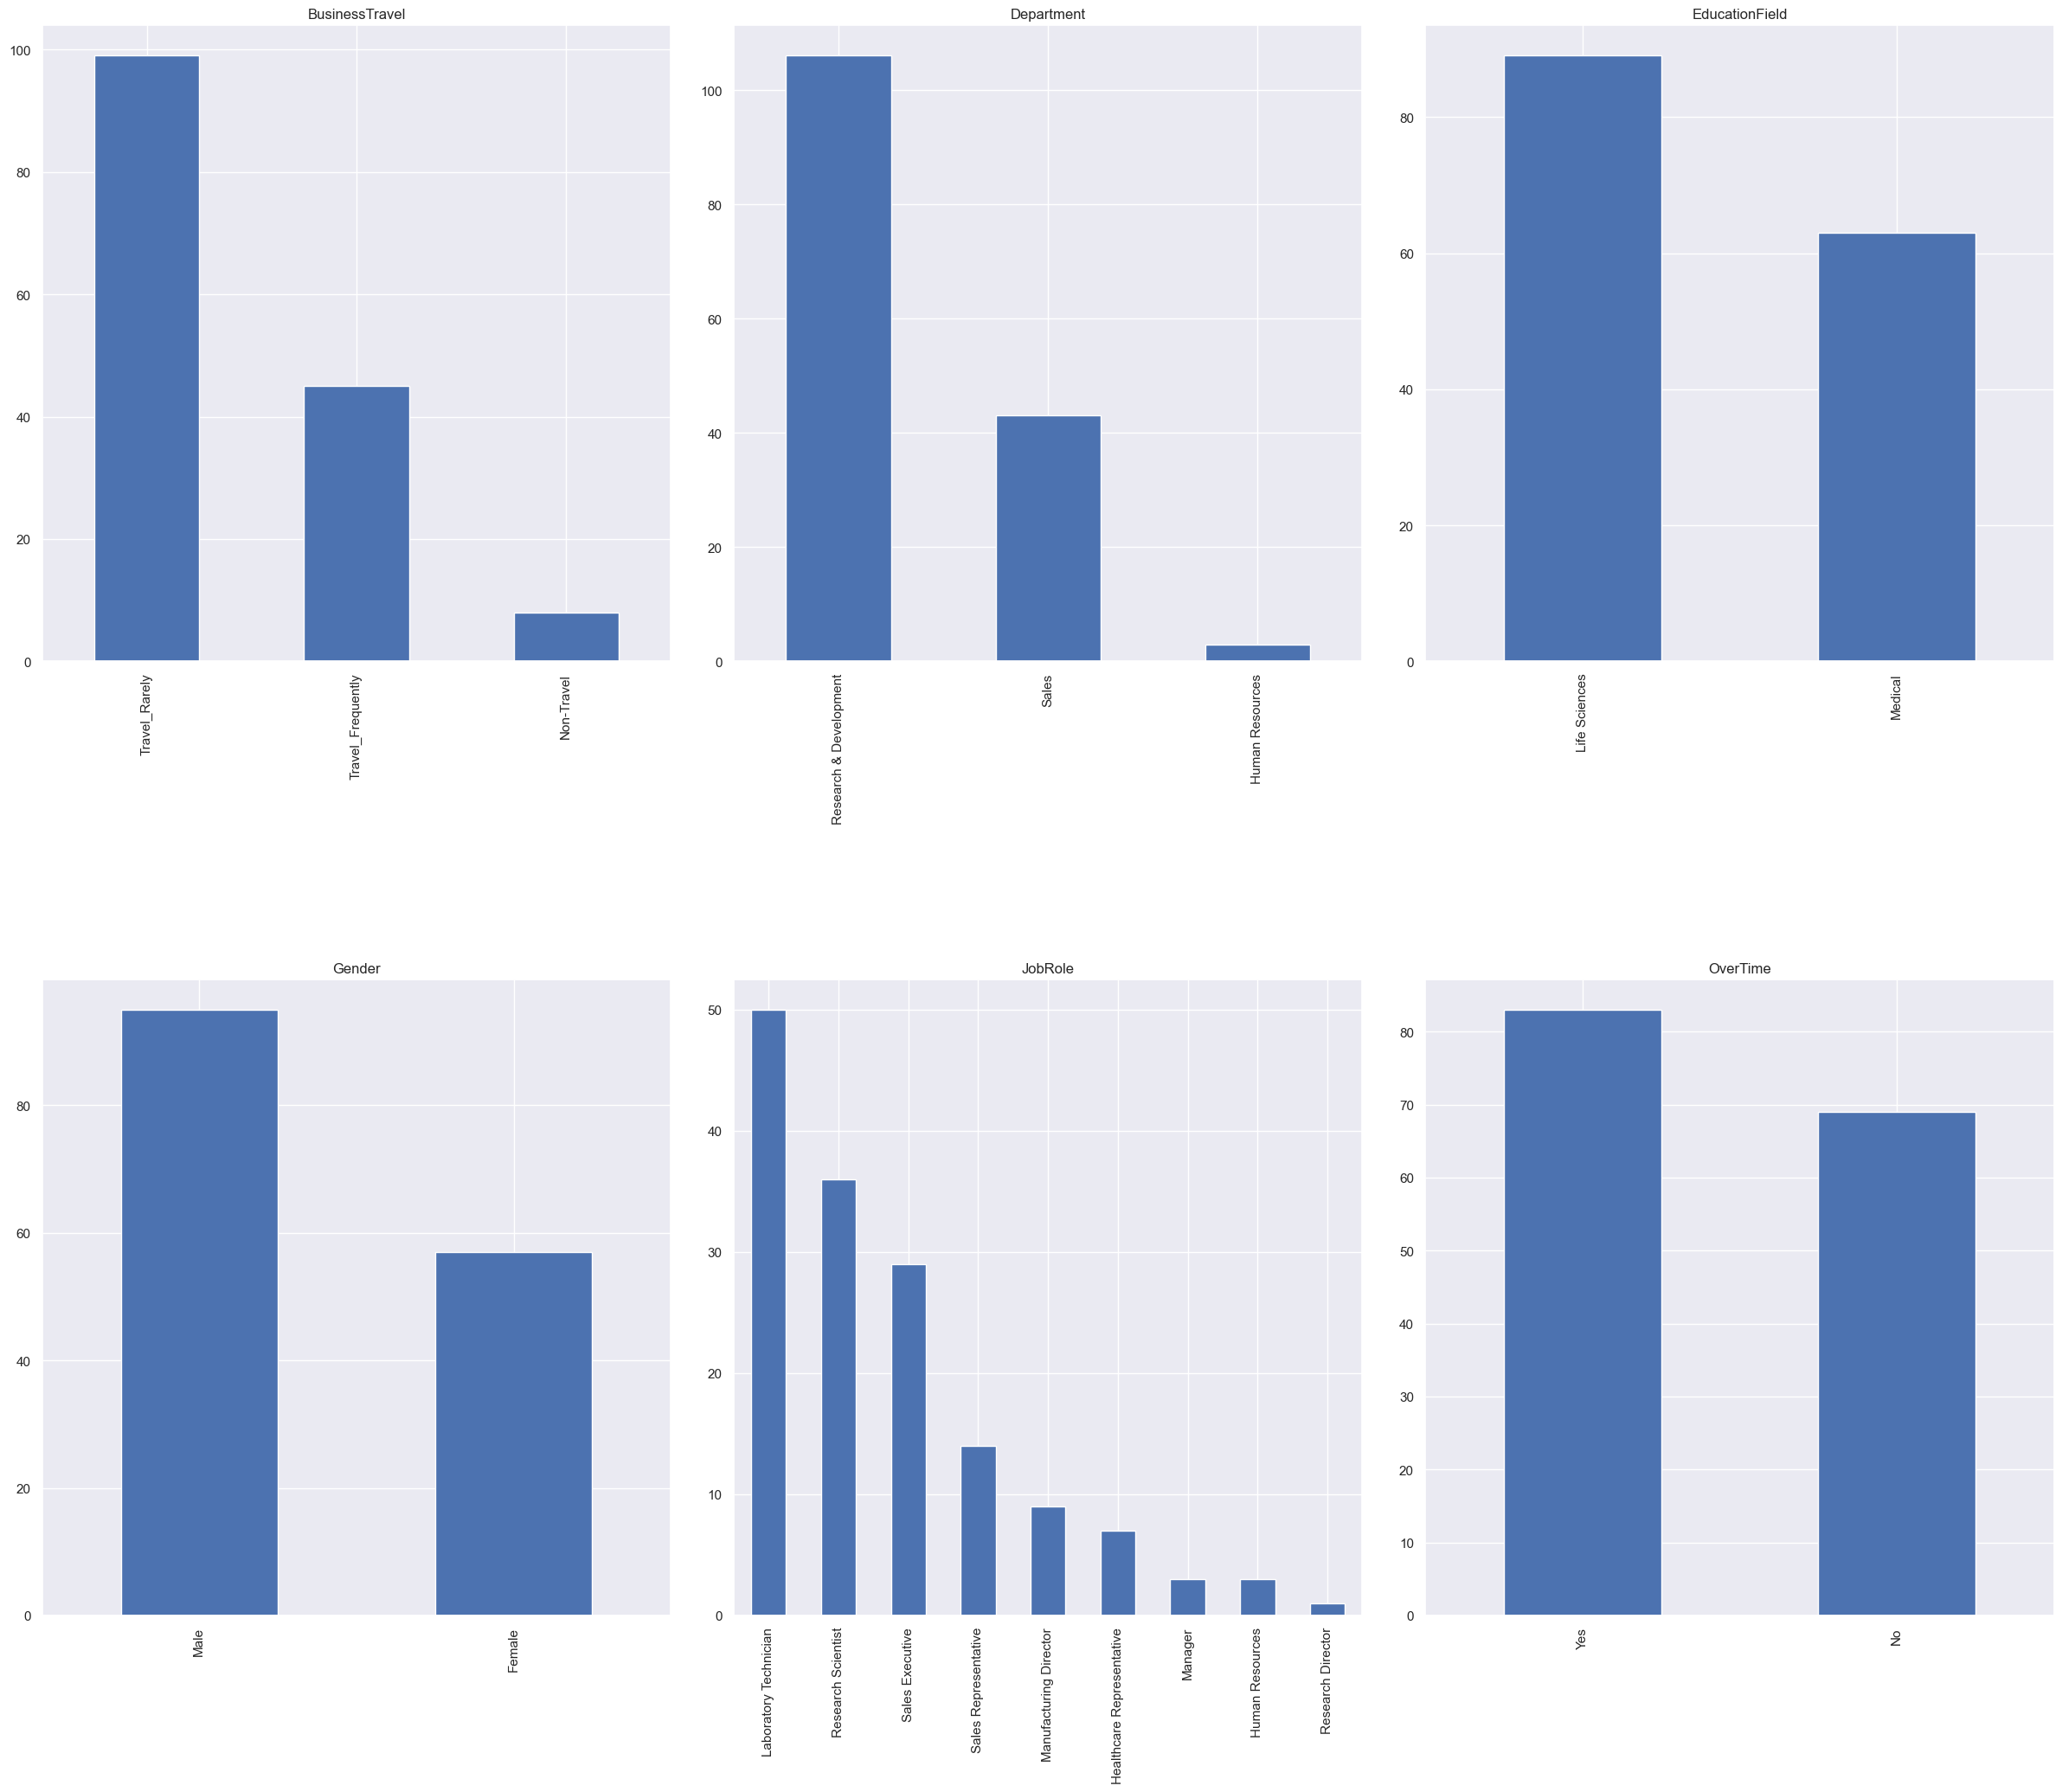

In [20]:
# analysis of categorical variables based on columns of interest
plt.figure(figsize=(30,30))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.1)
for i in cat:
    plt.subplot(3,3,x)
    x = x+1
    hp_newDF[i].value_counts().plot(kind='bar')
    plt.title(i)
plt.show()

## Human Resources

In [21]:
# Creating a dataframe based on employees in the Human Resources department 
HR_df = hp_newDF[(hp_newDF["Department"] == "Human Resources")]
HR_df

,Age,BusinessTravel,Department,DistanceFromHome,EducationField,Gender,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,OverTime,YearsAtCompany
31,26,Travel_Rarely,Human Resources,20,Medical,Female,1,Human Resources,2,2148,Yes,5
36,26,Travel_Frequently,Human Resources,17,Life Sciences,Female,1,Human Resources,3,2741,Yes,7
140,44,Travel_Rarely,Human Resources,1,Medical,Male,3,Human Resources,1,10482,No,20


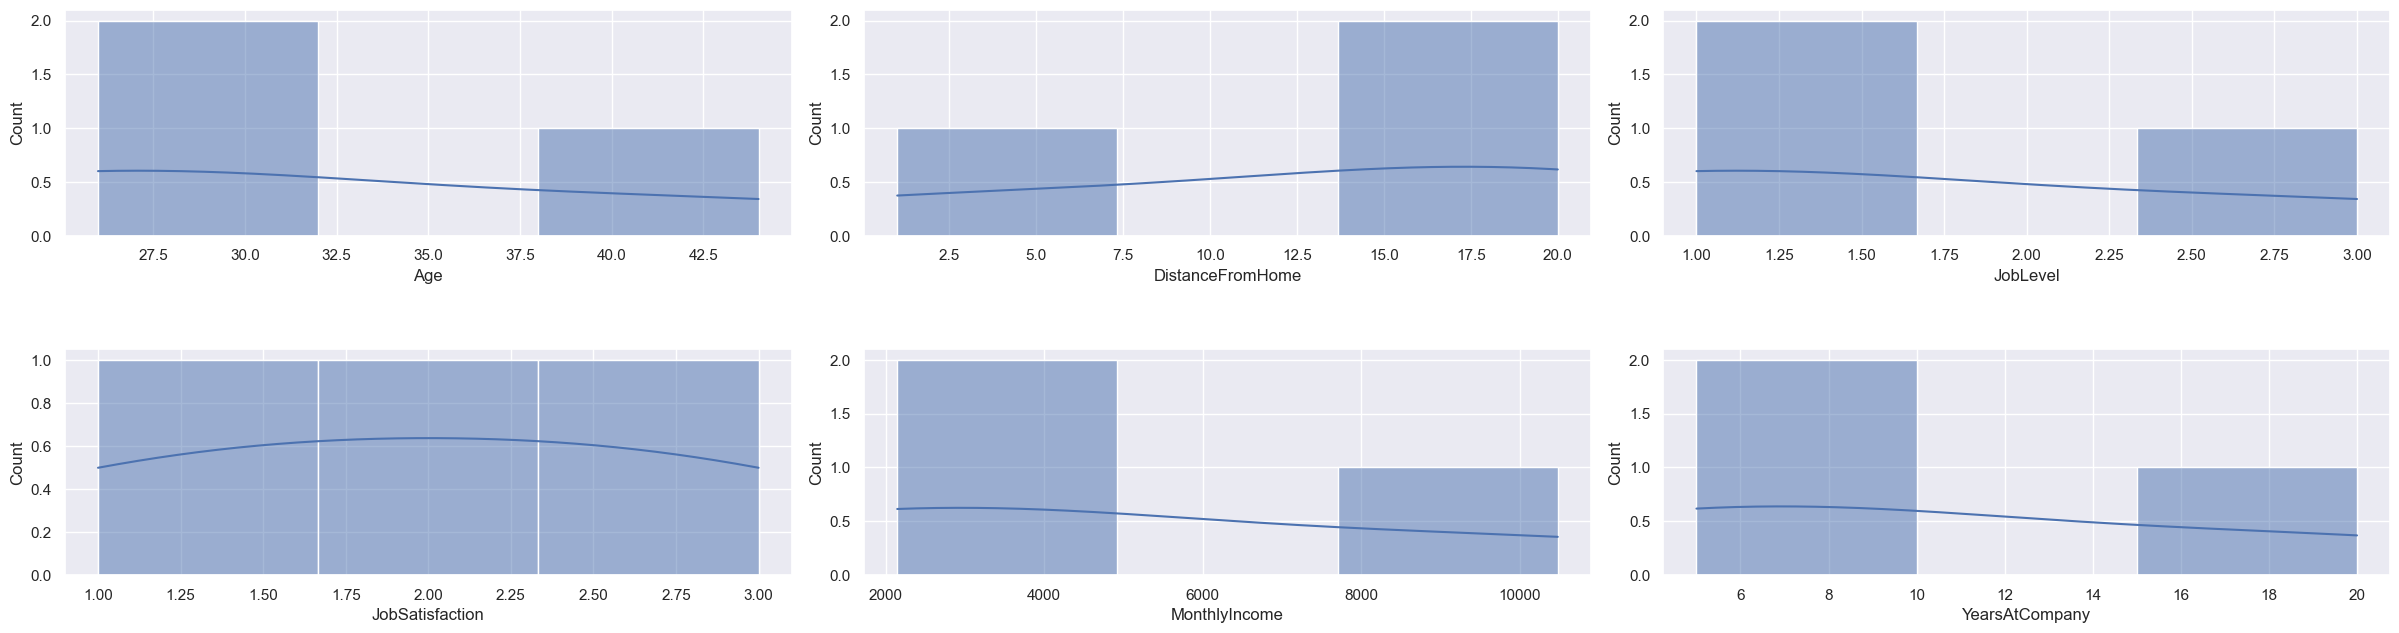

In [22]:
# analysis of continuous variables in Human Resources
plt.figure(figsize=(30,30))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.1)
x = 1

for i in con:
    plt.subplot(9,3,x)
    x = x+1
    sb.histplot(data = HR_df, x = i, kde=True)
plt.show()

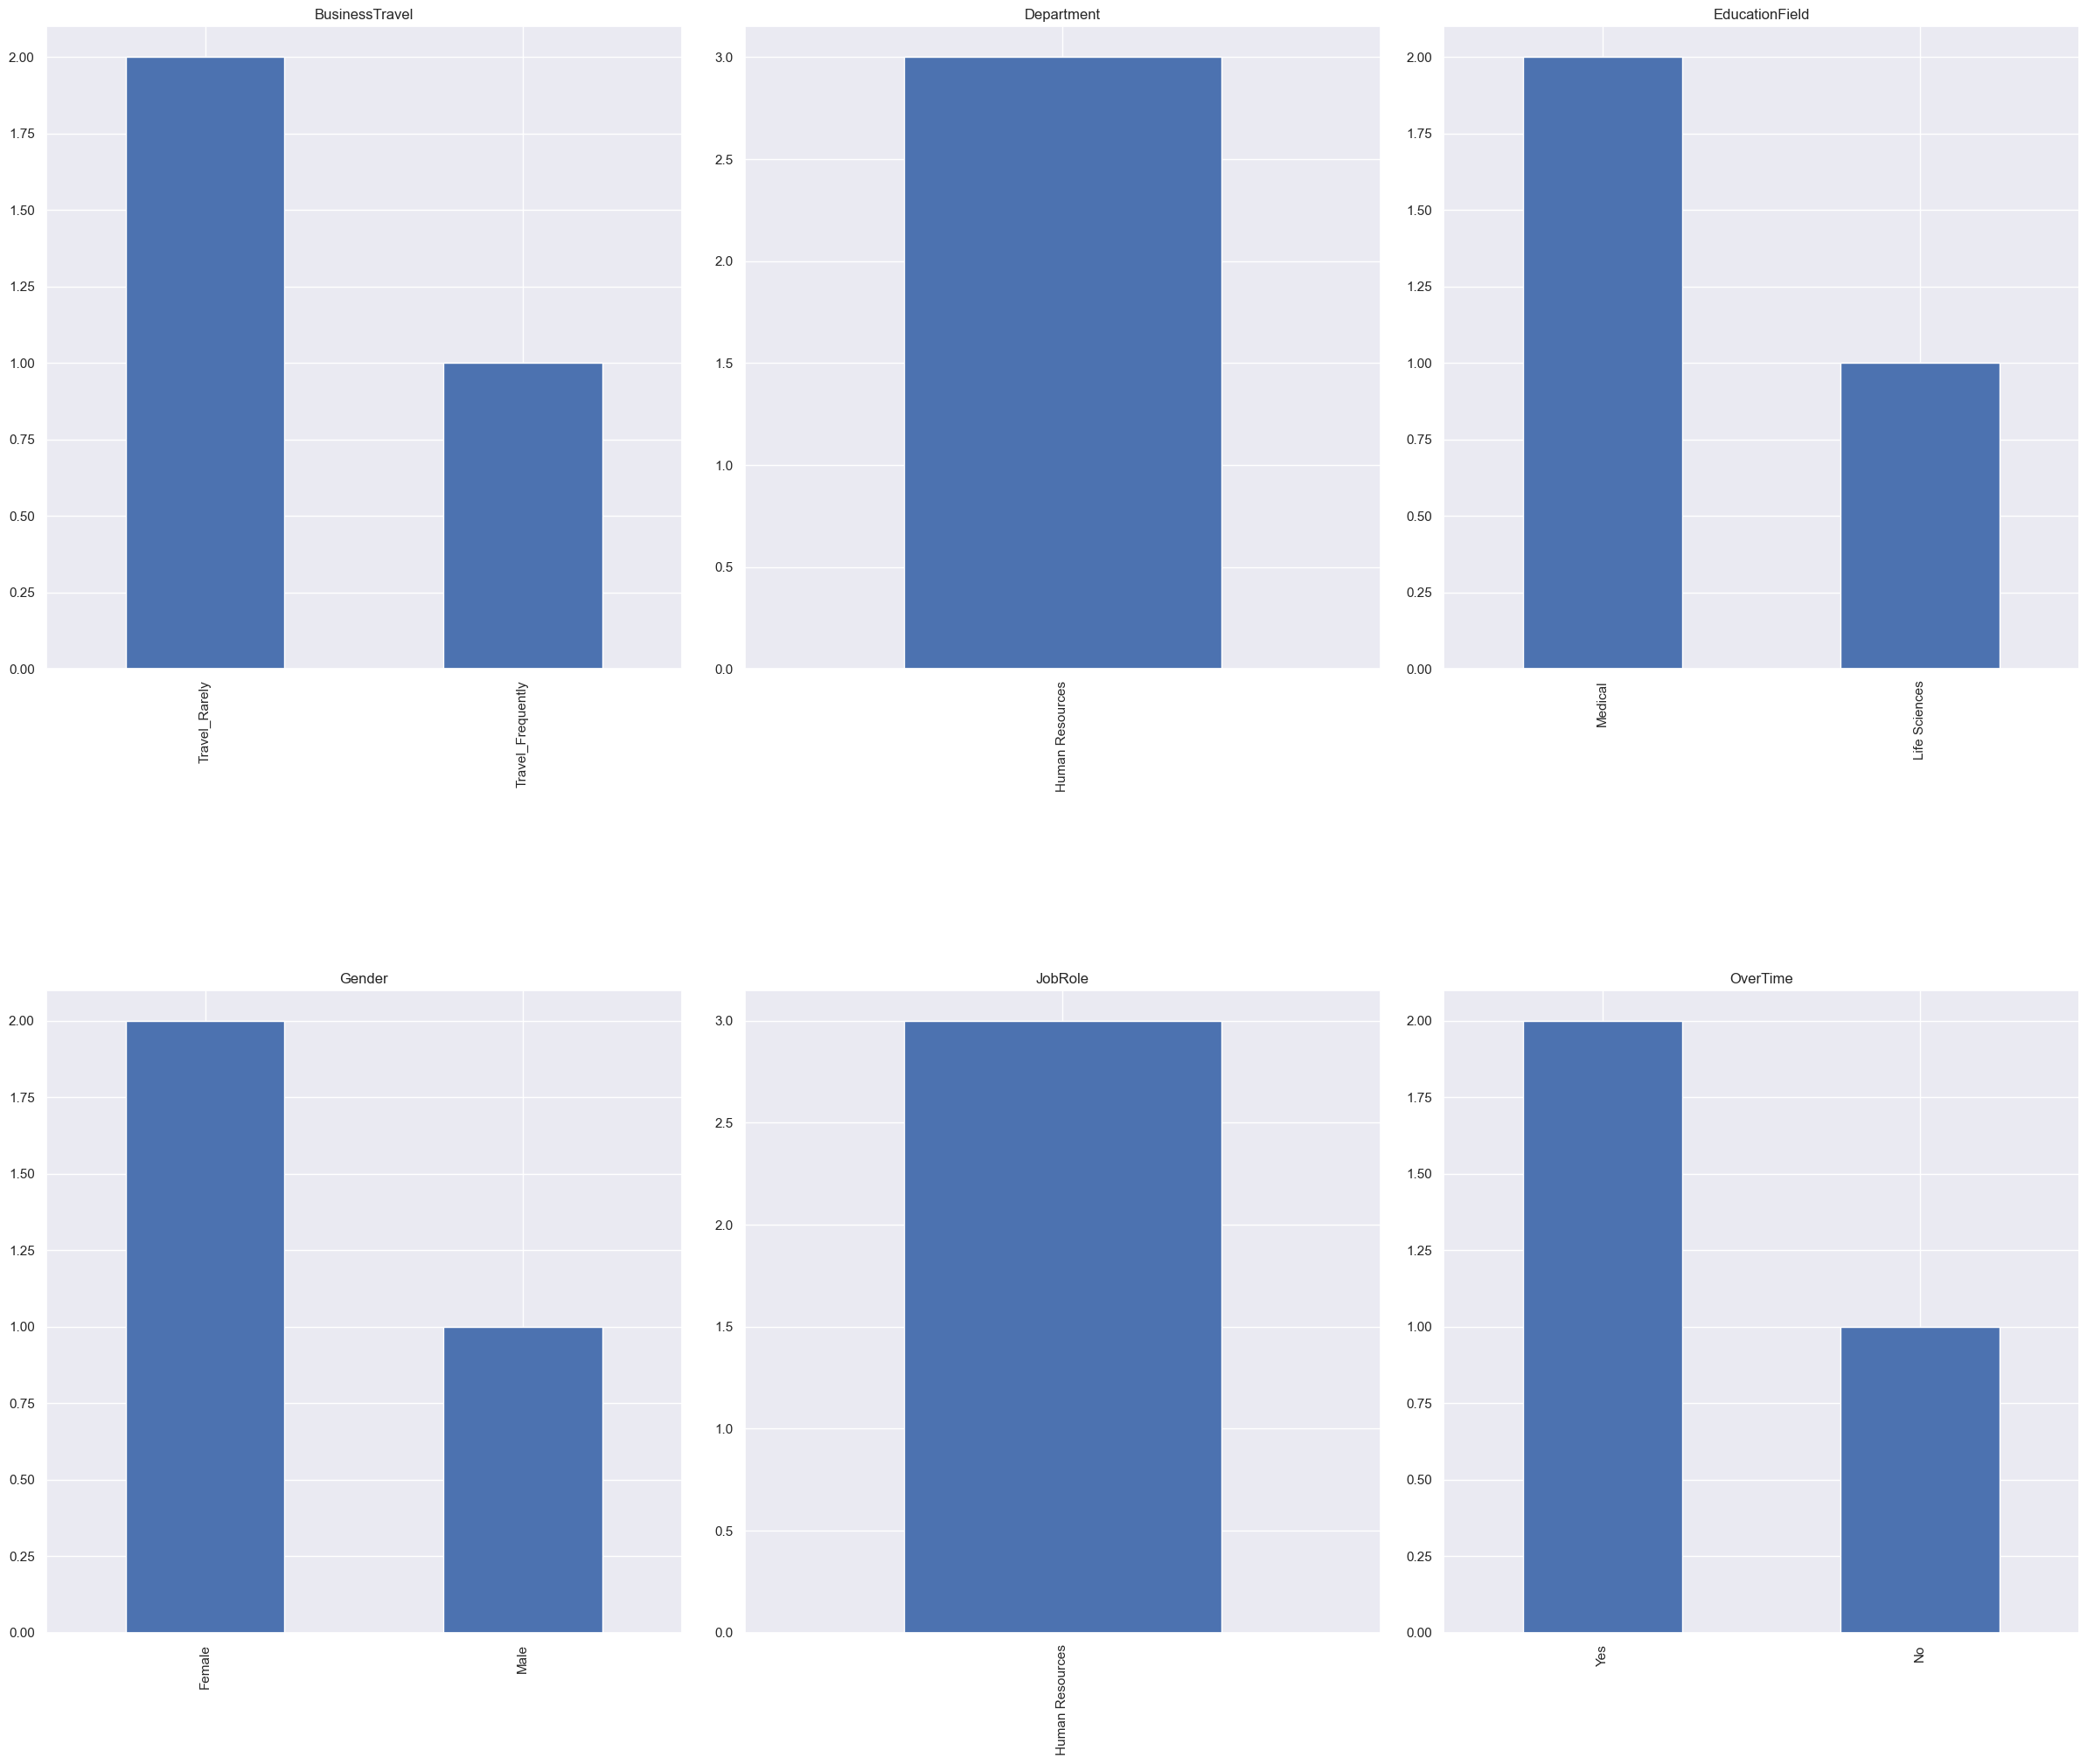

In [23]:
# analysis of categorical variables in Human Resources
plt.figure(figsize=(30,30))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.1)
for i in cat:
    plt.subplot(3,3,x)
    x = x+1
    HR_df[i].value_counts().plot(kind='bar')
    plt.title(i)
plt.show()

## Research & Development

In [24]:
# Creating a dataframe based on employees in the Research & Development department
RnD_df = hp_newDF[(hp_newDF["Department"] == "Research & Development")]
RnD_df

,Age,BusinessTravel,Department,DistanceFromHome,EducationField,Gender,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,OverTime,YearsAtCompany
1,31,Travel_Frequently,Research & Development,29,Medical,Male,1,Laboratory Technician,2,3479,No,5
2,33,Travel_Frequently,Research & Development,29,Medical,Female,2,Research Scientist,3,4508,No,13
3,38,Travel_Rarely,Research & Development,29,Medical,Male,2,Healthcare Representative,1,6673,Yes,1
4,47,Non-Travel,Research & Development,29,Life Sciences,Male,3,Manager,2,11849,Yes,10
5,49,Travel_Frequently,Research & Development,28,Life Sciences,Male,2,Laboratory Technician,1,4284,No,4
...,...,...,...,...,...,...,...,...,...,...,...,...
144,29,Travel_Rarely,Research & Development,1,Life Sciences,Female,1,Laboratory Technician,1,2319,Yes,1
145,29,Travel_Rarely,Research & Development,1,Medical,Male,1,Research Scientist,4,4787,Yes,2
148,32,Travel_Rarely,Research & Development,1,Life Sciences,Male,1,Laboratory Technician,3,3730,Yes,3
150,44,Travel_Frequently,Research & Development,1,Medical,Male,1,Research Scientist,2,2342,Yes,5


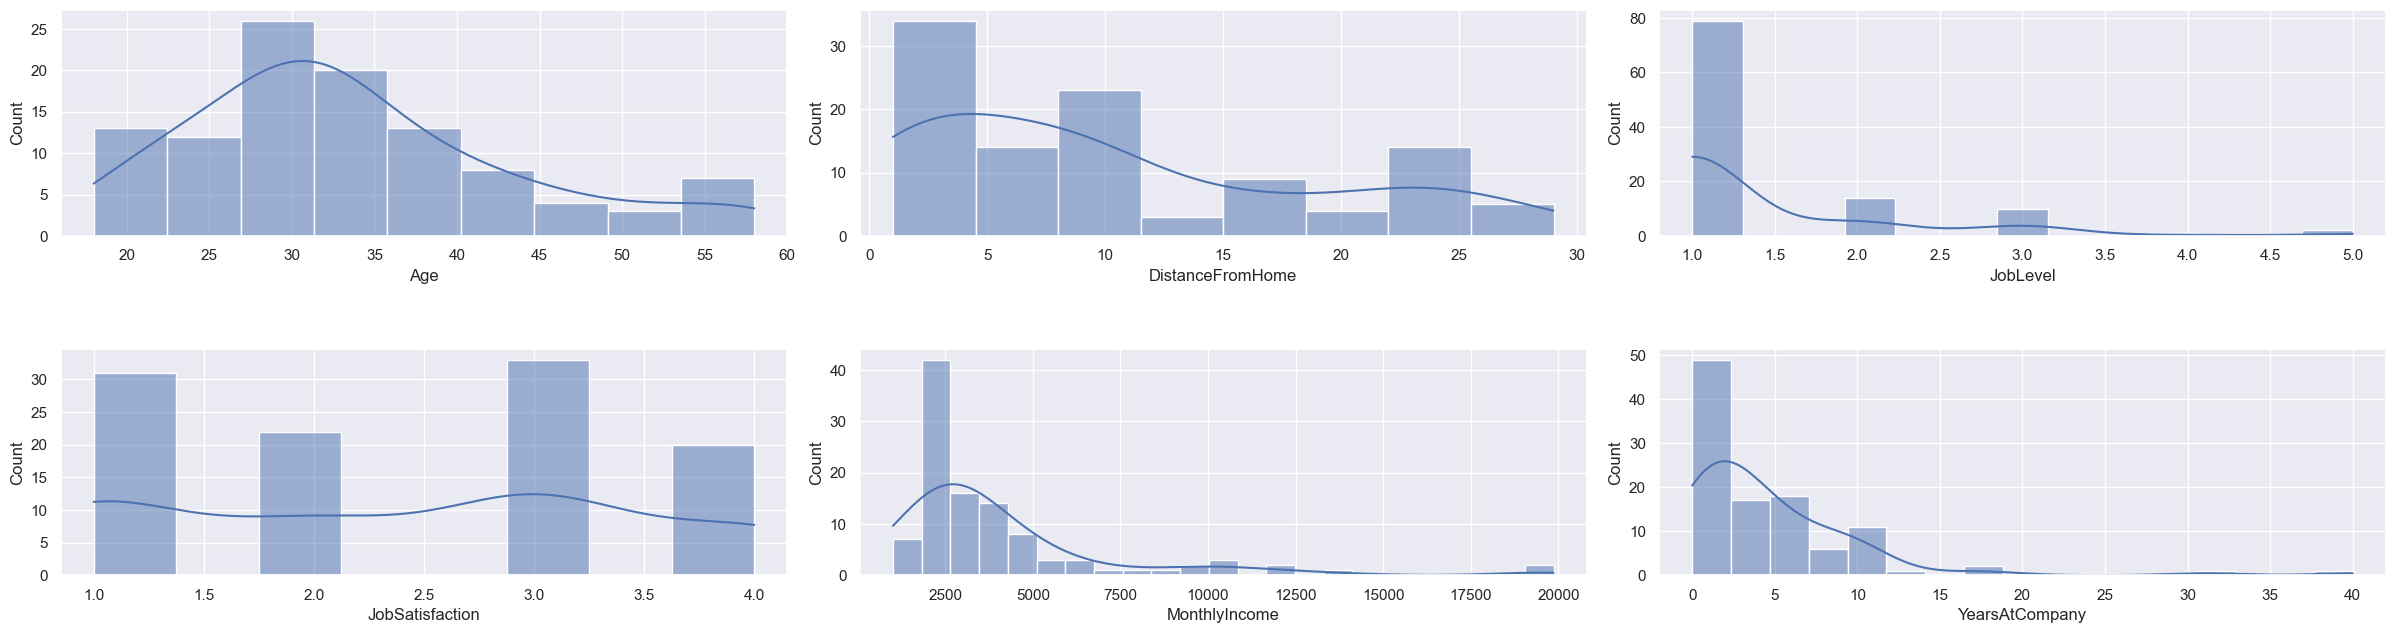

In [25]:
# analysis of continuous variables in Research & Development
plt.figure(figsize=(30,30))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.1)
x = 1

for i in con:
    plt.subplot(9,3,x)
    x = x+1
    sb.histplot(data = RnD_df, x = i, kde=True)
plt.show()

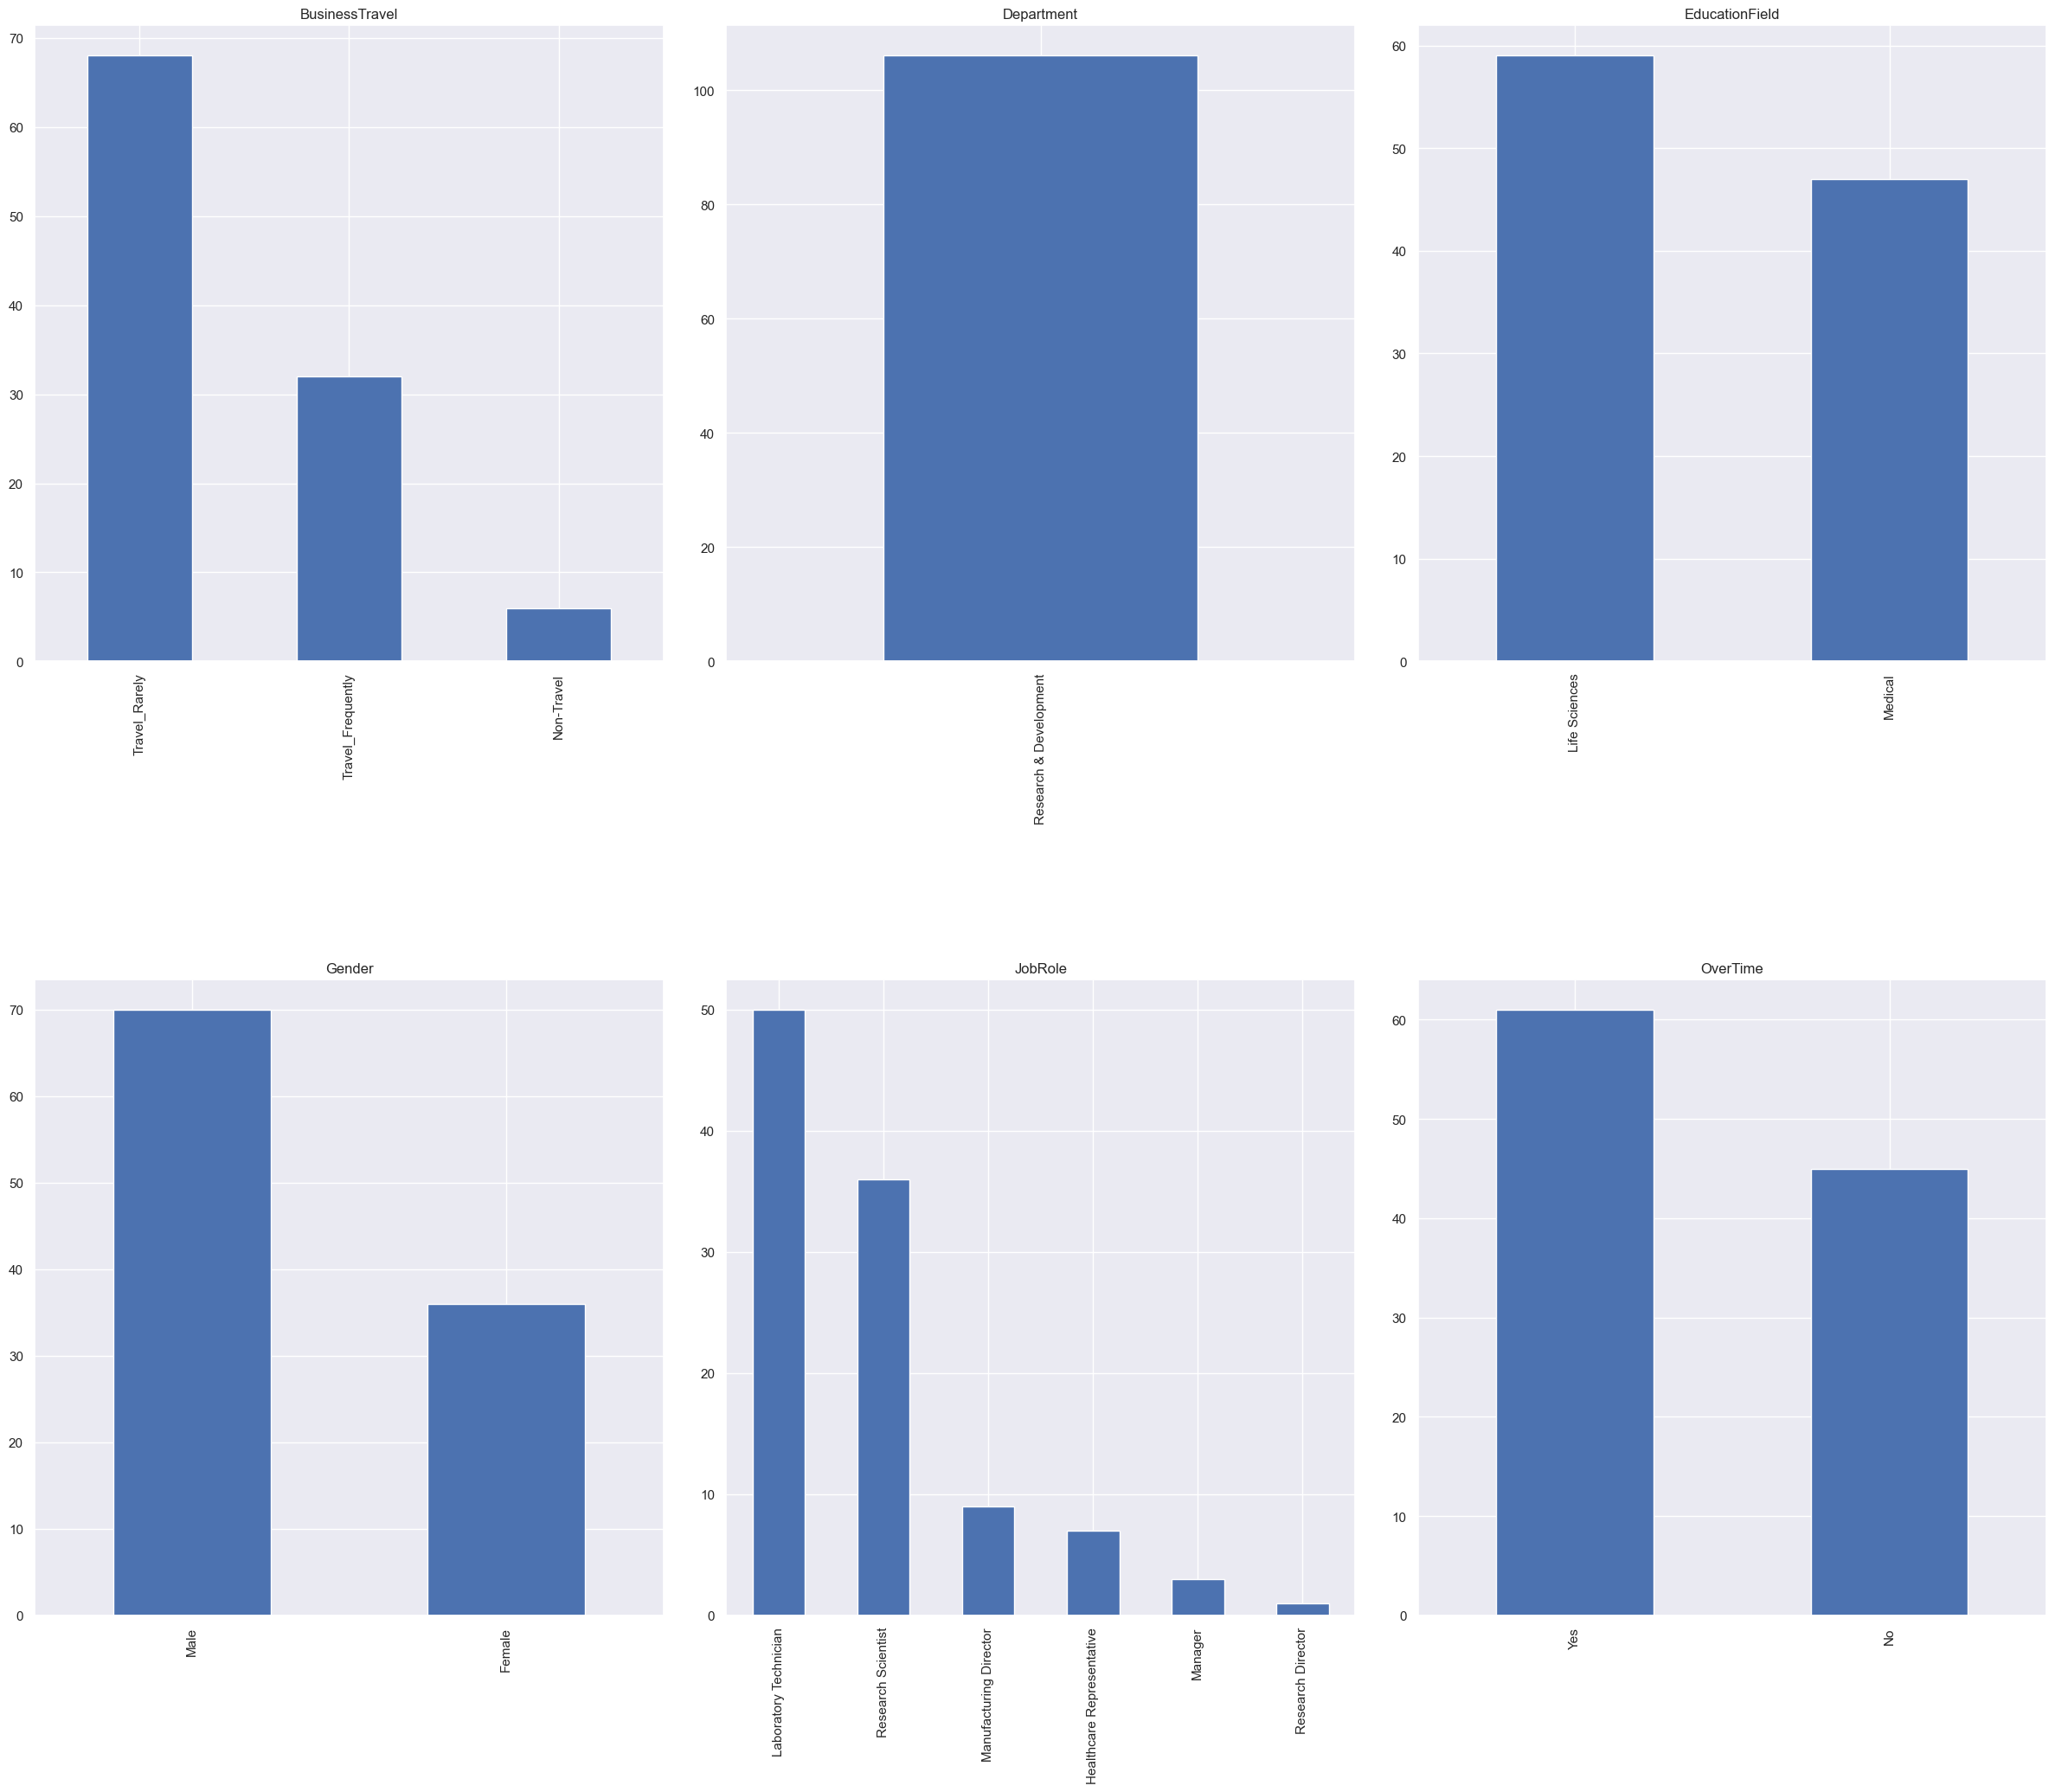

In [26]:
# analysis of categorical variables in Research & Development
plt.figure(figsize=(30,30))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.1)
for i in cat:
    plt.subplot(3,3,x)
    x = x+1
    RnD_df[i].value_counts().plot(kind='bar')
    plt.title(i)
plt.show()

## Sales

In [27]:
# Creating a dataframe based on employees in the Sales department
Sales_df = hp_newDF[(hp_newDF["Department"] == "Sales")]
Sales_df.head()

,Age,BusinessTravel,Department,DistanceFromHome,EducationField,Gender,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,OverTime,YearsAtCompany
0,26,Non-Travel,Sales,29,Medical,Male,2,Sales Executive,1,4969,No,2
6,35,Travel_Rarely,Sales,27,Life Sciences,Male,2,Sales Executive,4,5813,Yes,10
7,47,Travel_Frequently,Sales,27,Life Sciences,Female,2,Sales Executive,3,6397,Yes,5
8,45,Travel_Frequently,Sales,26,Life Sciences,Female,2,Sales Executive,1,4286,No,1
14,25,Travel_Frequently,Sales,24,Life Sciences,Male,1,Sales Representative,4,1118,Yes,1


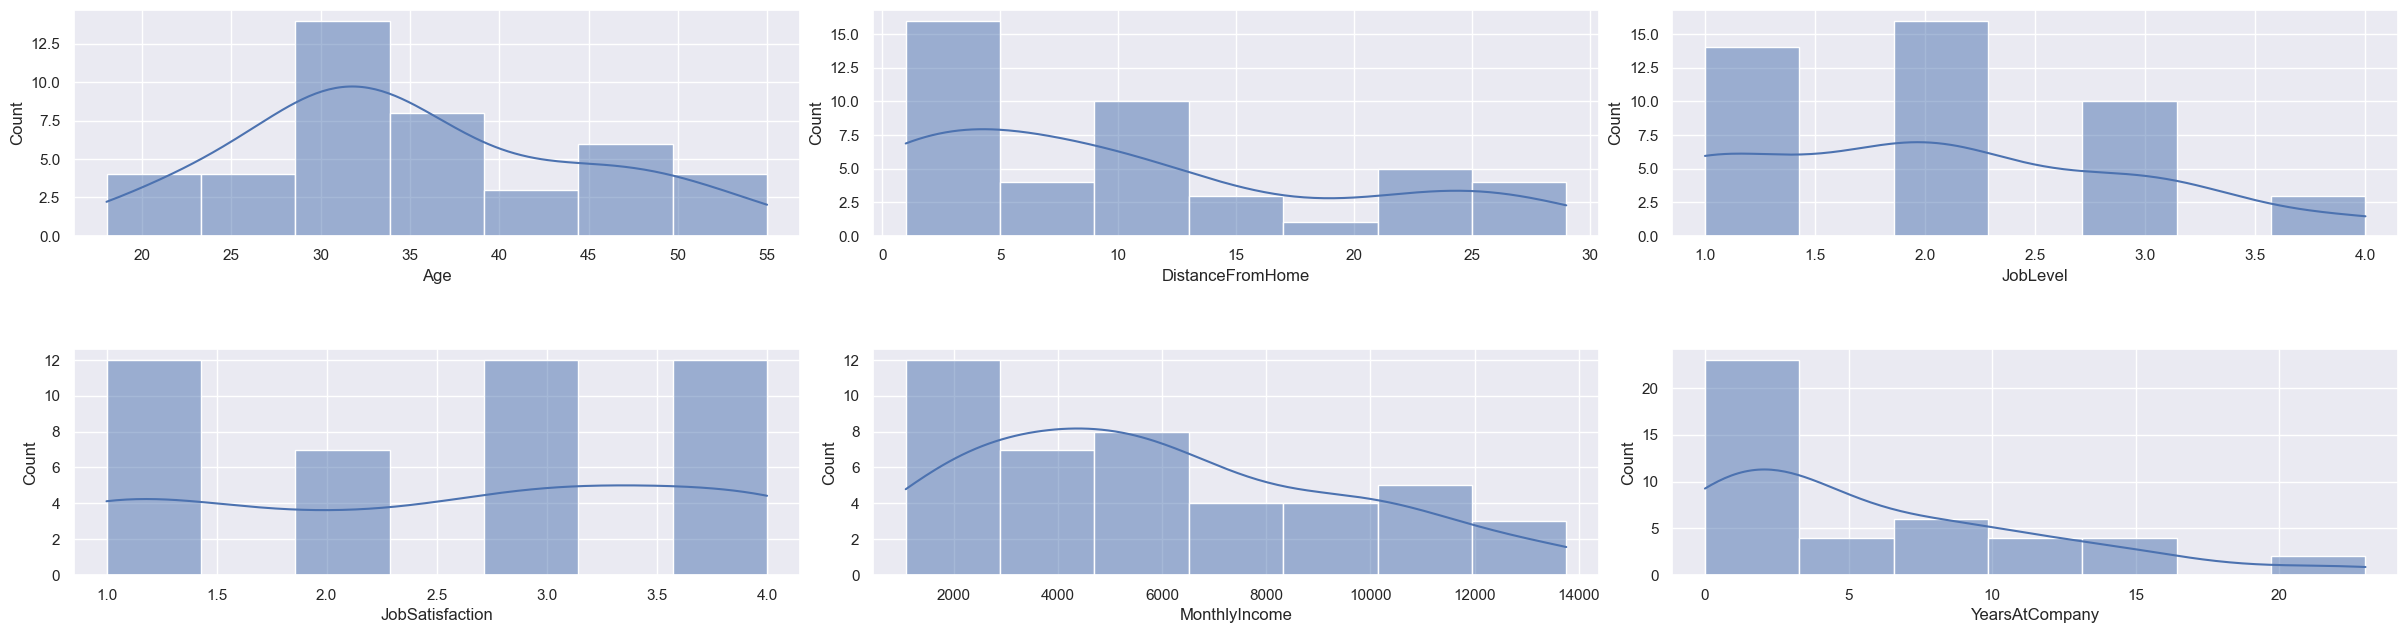

In [28]:
# analysis of continuous variables in Sales
plt.figure(figsize=(30,30))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.1)
x = 1

for i in con:
    plt.subplot(9,3,x)
    x = x+1
    sb.histplot(data = Sales_df, x = i, kde=True)
plt.show()

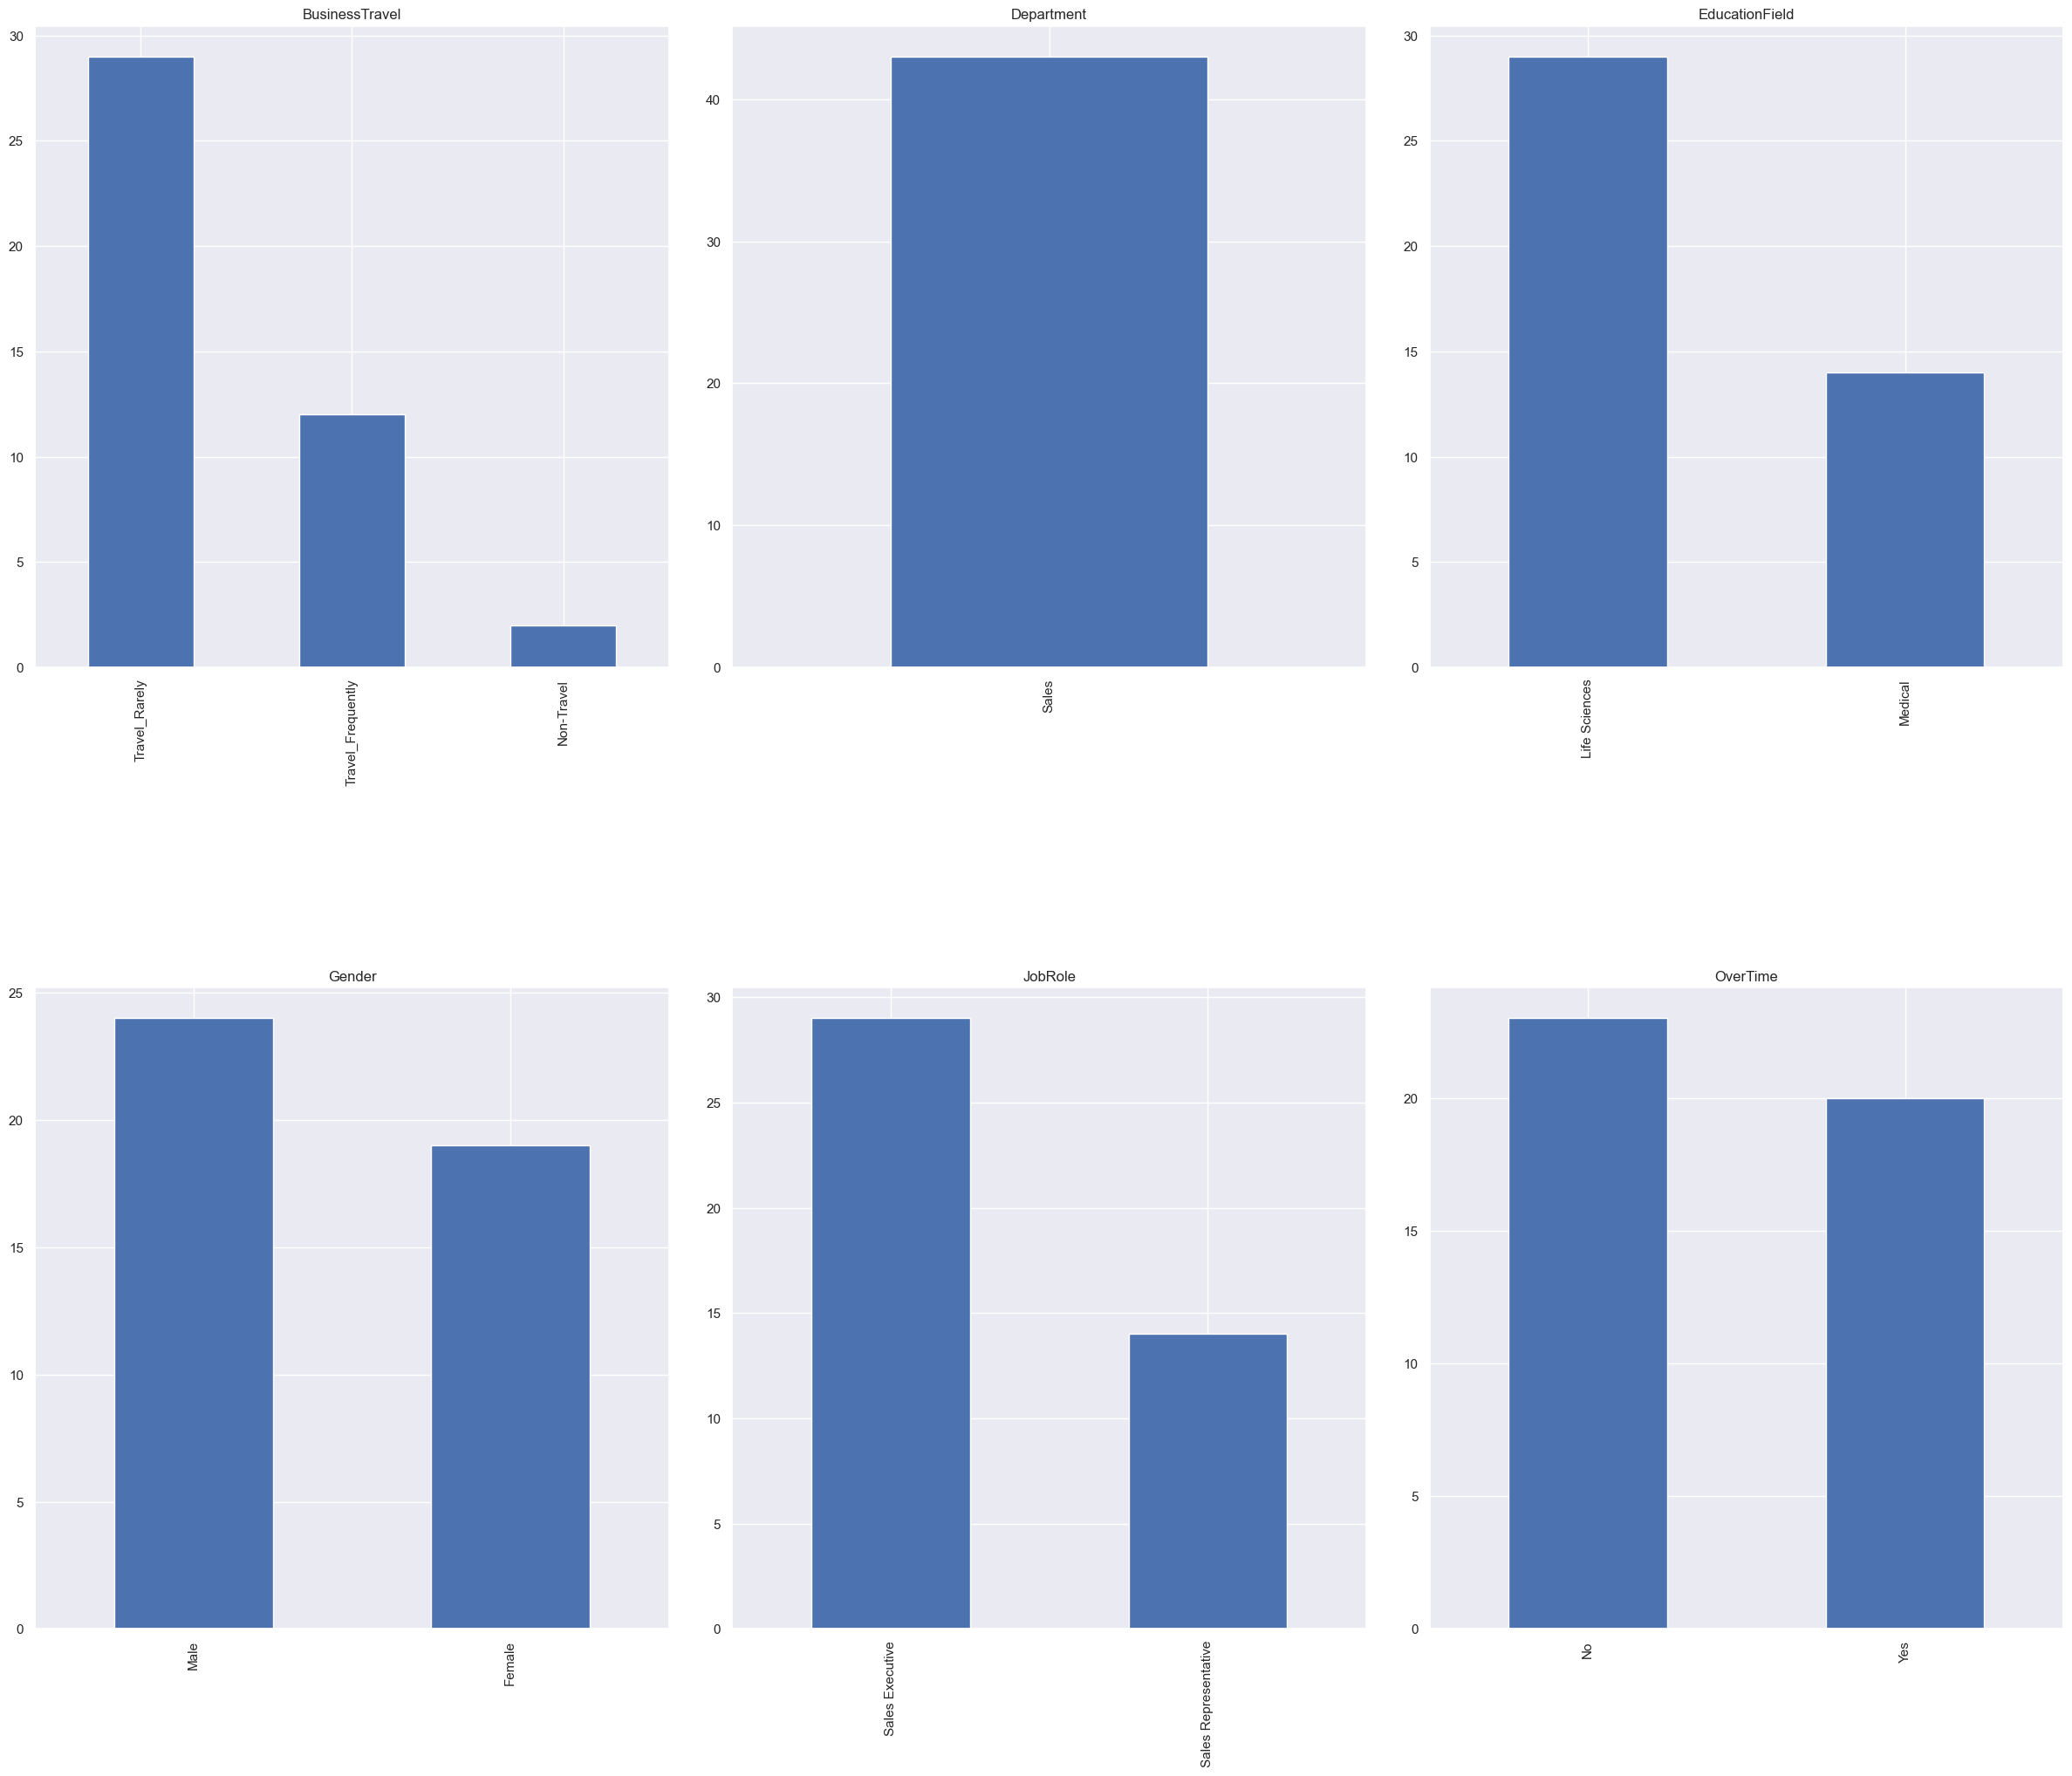

In [29]:
# analysis of categorical variables in Sales
plt.figure(figsize=(30,30))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.1)
for i in cat:
    plt.subplot(3,3,x)
    x = x+1
    Sales_df[i].value_counts().plot(kind='bar')
    plt.title(i)
plt.show()

# Comparison with COVID-19 Rates

In [30]:
# To add once csv files are added in main branch